In [135]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)
sns.set_palette('RdYlGn')

plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
import missingno
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [12]:
def distribution(df):
    """Fonction renvoie différents calcul coefficients de distribution ainsi 
    qu'un graphique de la distribution pour chaque variable quantitatives du dataframe d'entré
    
    Entrée : 
    - Dataframe
    
    Sortie :
    - Variance, Déviation standard
    - Coefficient d'asymétire et d'applatissement
    - Graphique de distribution
    """
    for column in df.select_dtypes(exclude='object'):
        print("-"*20)
        print(column)
        print("var:\n",data[column].var(ddof=0))
        print("std:\n",data[column].std(ddof=0))
        print("Skewness:\n",data[column].skew())
        print("kurtosis:\n",data[column].kurtosis())
        ax = sns.distplot(a=df[column], kde=True)
        ax.set_ylabel("Valeur")
        ax.set_xlabel(str(column))
        ax.set_title("Distribution de la variable "+str(column))
        plt.axvline(x=df[column].mean(), color='r', linestyle='--', linewidth=2, label='Moyenne')
        plt.axvline(x=df[column].median(), color='g', linestyle='-', linewidth=2, label='Mediane')
        plt.legend(loc='upper right')
        ax.autoscale()
        plt.savefig("Distribution de la variable "+str(column)+".png", transparent=True)
        plt.show()       

def eta_squared(x,y):
    """Fonction de calcul eta carré en fonction de 
    SCT correspond à la variation totale 
    SCE correspond variation interclasse 
    
    Entrée : 
    x variable qualitative
    y variable quantitative
    
    Sortie : 
    - Résultat: rapport de corrélation ( variation interclasse / variation totale )
    """
    moyenne_y = y.mean()
    classes = []
    
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),'moyenne_classe': yi_classe.mean()})

    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    return SCE/SCT

# Ojectifs:


- **Quel problèmatique voulons nous résoudre ?:**

    - Analyser le dataset afin de determiner la faisabilité de notre application mobile


- **A quelles questions voulons nous répondre ?:**

    - La distribution des variables
    - Visualition et précision de la relations entre les variables nottament la targets (nutriscore)
    - Confirmer ou infirmer la corrélation entre la target et les différentes variables de calcul

In [4]:
data = pd.read_csv("./../dataset_nettoyer.csv", 
                   low_memory=False,  
                   encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45881 entries, 0 to 45880
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             45881 non-null  object 
 1   categories_tags          45881 non-null  object 
 2   labels_en                45881 non-null  object 
 3   countries_en             45881 non-null  object 
 4   additives_n              45881 non-null  float64
 5   nutriscore_score         45881 non-null  float64
 6   nutriscore_grade         45881 non-null  object 
 7   main_category_en         37191 non-null  object 
 8   energy-kcal_100g         45881 non-null  float64
 9   energy_100g              45881 non-null  float64
 10  fat_100g                 45881 non-null  float64
 11  saturated-fat_100g       45881 non-null  float64
 12  carbohydrates_100g       45881 non-null  float64
 13  sugars_100g              45881 non-null  float64
 14  fiber_100g            

# Analyses descriptives

## Distribution des variables

### Distribution des variables qualitatives

In [113]:
data['nutriscore_grade'].value_counts()

e    15153
b    11391
c     8497
d     7112
a     3728
Name: nutriscore_grade, dtype: int64

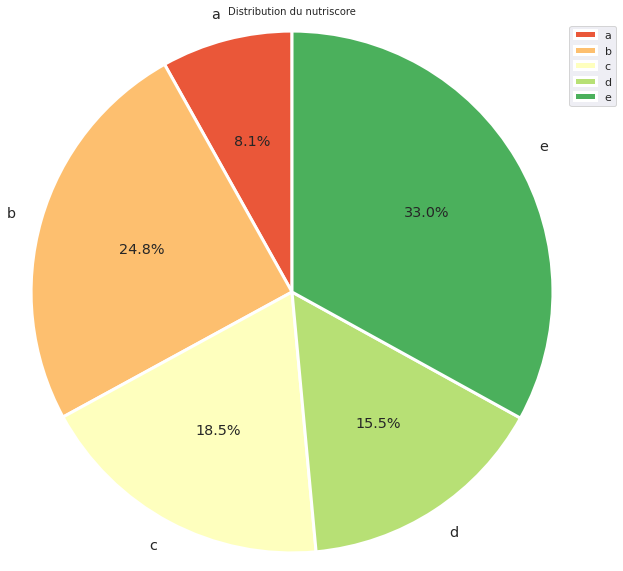

In [118]:
sns.set_palette('RdYlGn', 5)

ax = data.groupby(['nutriscore_grade']).size().plot.pie(
            autopct="%.1f%%", startangle=90, radius=1.2,
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'x-large'})
ax.set_ylabel('')
plt.legend(bbox_to_anchor=(1,1),loc="best")
plt.title("Distribution du nutriscore", fontsize=10);
plt.savefig("PieChart_nutriscore.png")

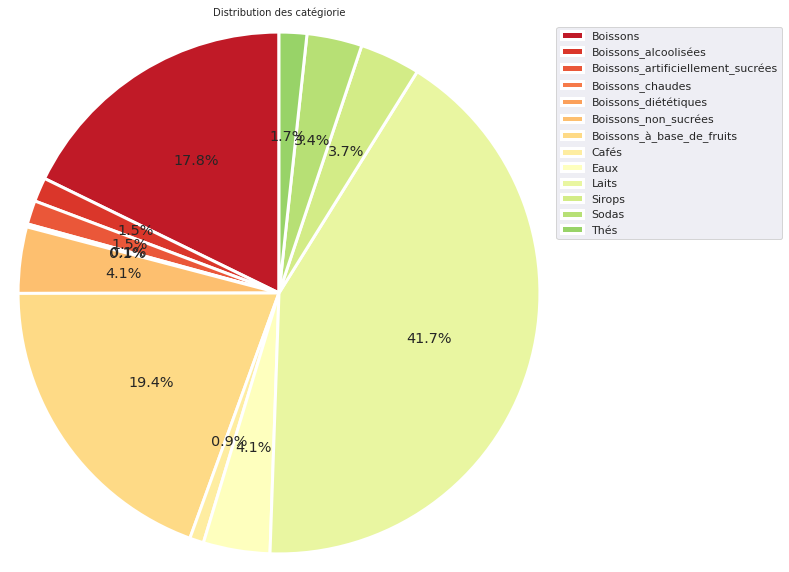

In [125]:
sns.set_palette('RdYlGn', 17)

ax = data.groupby(['main_category_en']).size().plot.pie(
            autopct="%.1f%%", startangle=90, radius=1.2,labeldistance=None,
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'x-large'})
ax.set_ylabel('')
plt.legend(bbox_to_anchor=(1,1),loc="best")
plt.title("Distribution des catégiorie", fontsize=10);
plt.savefig("PieChart_main_category_en.png")

### Distribution des quantiles

In [5]:
data.describe()

,additives_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000,45881.000000
mean,0.961923,7.708441,102.901528,429.900387,3.673841,2.005947,14.755672,12.280003,0.399447,2.611081,0.258298,0.103319,7.708441
std,1.730379,8.052253,149.188987,620.890105,9.046088,5.303840,19.283696,16.749472,2.171853,7.293575,2.790059,1.115935,8.052253
min,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000
25%,0.000000,1.000000,32.000000,134.000000,0.000000,0.000000,4.800000,4.170000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,5.000000,46.000000,193.000000,0.200000,0.000000,9.000000,7.710000,0.000000,0.500000,0.040000,0.016000,5.000000
75%,1.000000,14.000000,70.000000,295.000000,1.900000,1.000000,12.500000,11.100000,0.000000,3.300000,0.130000,0.052000,14.000000
max,20.000000,40.000000,1962.000000,8209.000000,100.000000,100.000000,105.000000,103.500000,100.000000,92.000000,227.250000,90.900000,40.000000


In [14]:
data.describe().to_csv("Ma_distribution.csv")

### Distribution graphique

--------------------
additives_n
var:
 2.99414746613516
std:
 1.7303605017842842
Skewness:
 2.363242739701472
kurtosis:
 6.652057719252163


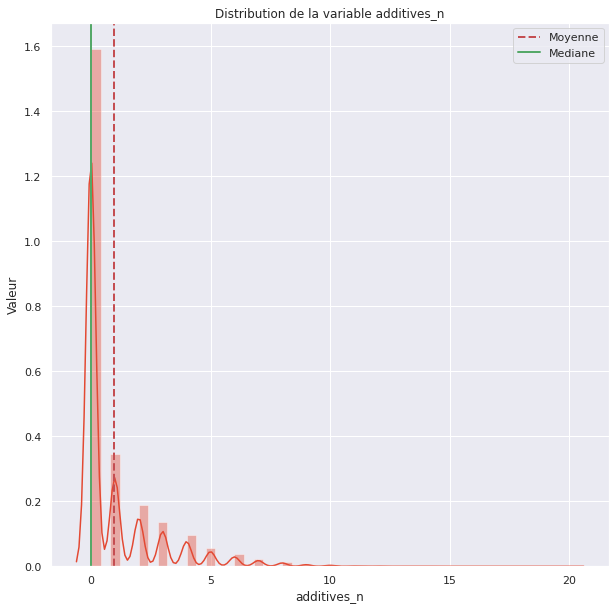

--------------------
nutriscore_score
var:
 64.83735796177844
std:
 8.052164799715568
Skewness:
 0.709771231443266
kurtosis:
 -0.32788155347298353


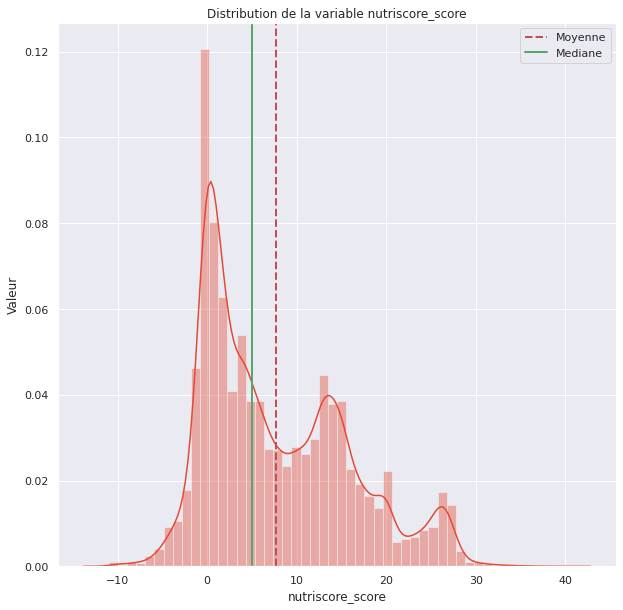

--------------------
energy-kcal_100g
var:
 22256.868677358787
std:
 149.18736098396133
Skewness:
 2.3688866670688067
kurtosis:
 5.859429116061072


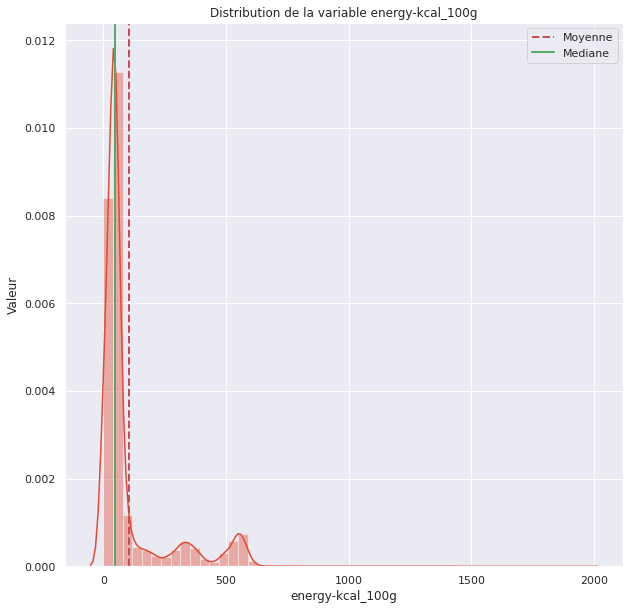

--------------------
energy_100g
var:
 385496.12047830905
std:
 620.8833388635171
Skewness:
 2.316338894025437
kurtosis:
 5.163504337985566


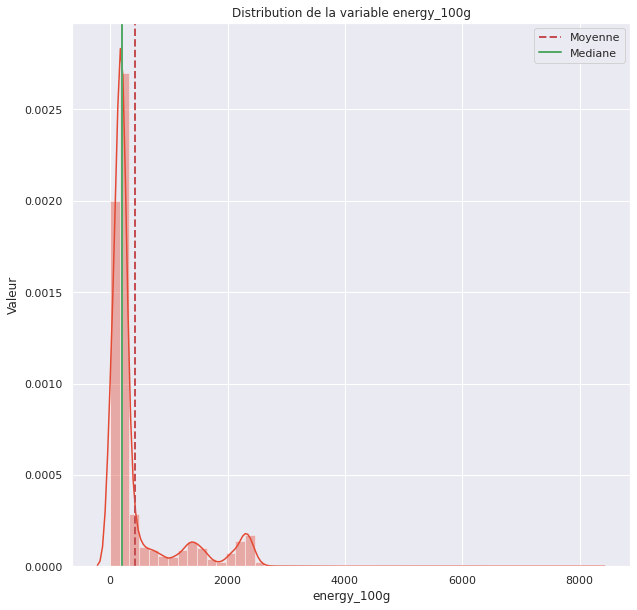

--------------------
fat_100g
var:
 81.82992558173486
std:
 9.045989474995803
Skewness:
 3.2422676808033284
kurtosis:
 10.72332344590414


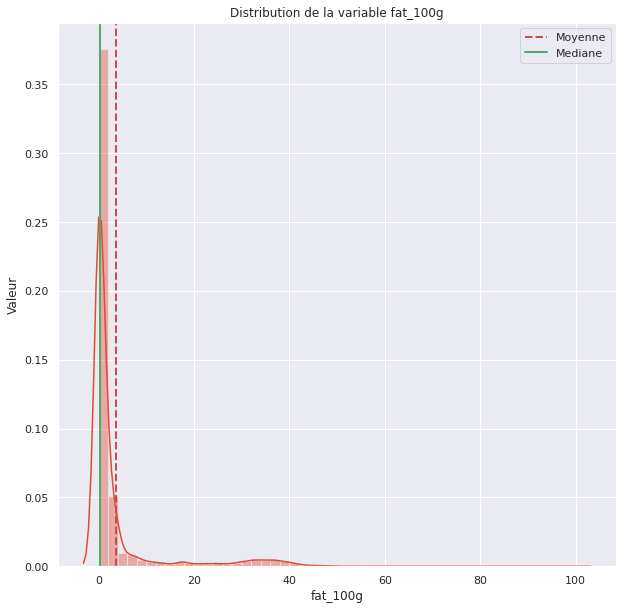

--------------------
saturated-fat_100g
var:
 28.130105868324243
std:
 5.303782222935275
Skewness:
 3.594602232391896
kurtosis:
 17.073893519545408


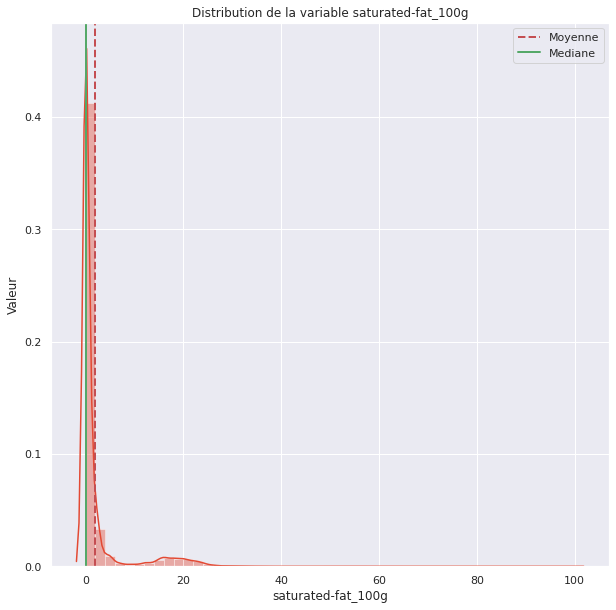

--------------------
carbohydrates_100g
var:
 371.8528445598378
std:
 19.283486317568144
Skewness:
 2.245321375111408
kurtosis:
 4.2474372456608425


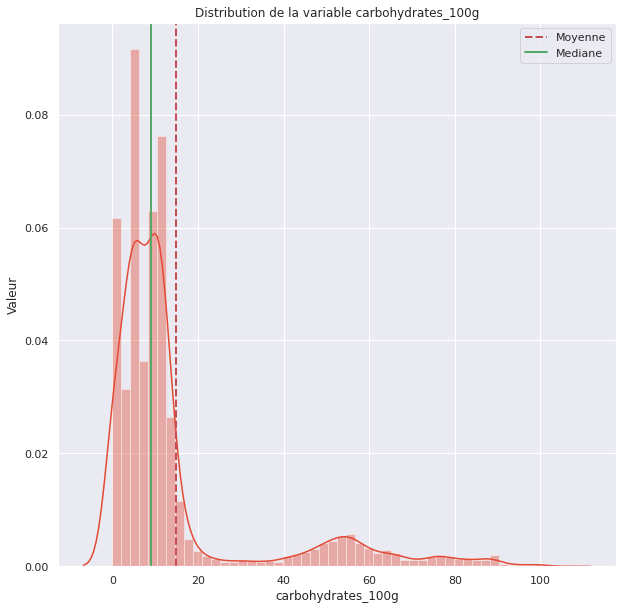

--------------------
sugars_100g
var:
 280.53871418120855
std:
 16.749289960509028
Skewness:
 2.5553359462028284
kurtosis:
 6.209476744713223


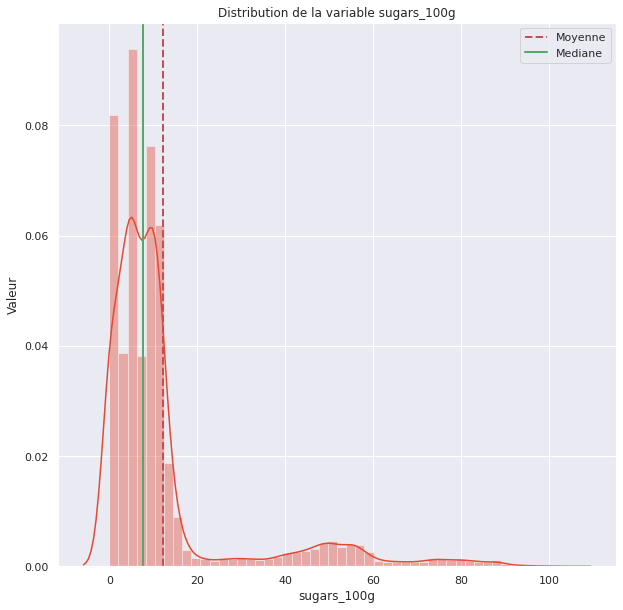

--------------------
fiber_100g
var:
 4.7168428039904144
std:
 2.1718293680651835
Skewness:
 18.64302846183844
kurtosis:
 530.6727775324026


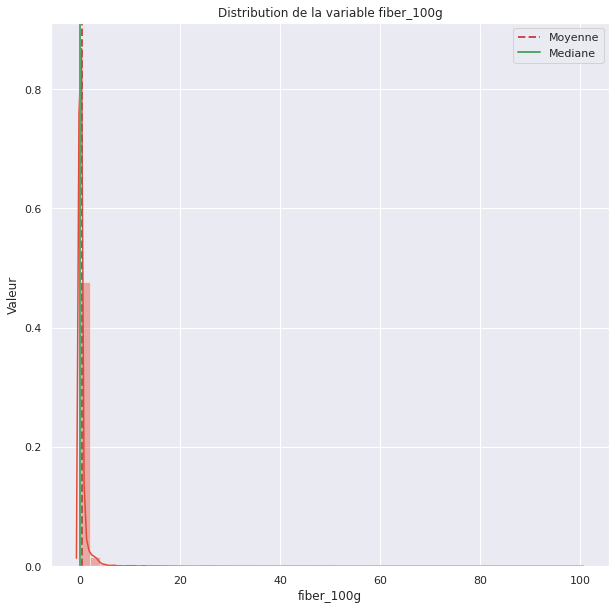

--------------------
proteins_100g
var:
 53.19507067608656
std:
 7.293495093306539
Skewness:
 7.62453650837444
kurtosis:
 67.27107520207315


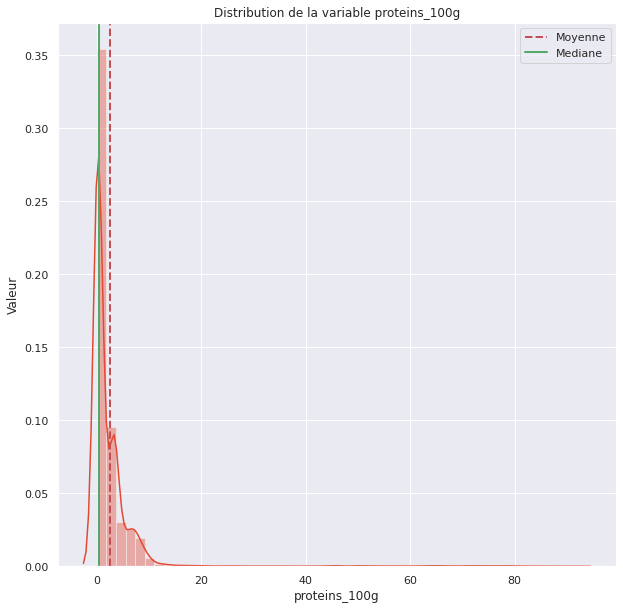

--------------------
salt_100g
var:
 7.784258666801933
std:
 2.790028434765842
Skewness:
 39.00228171382263
kurtosis:
 2009.8828275230353


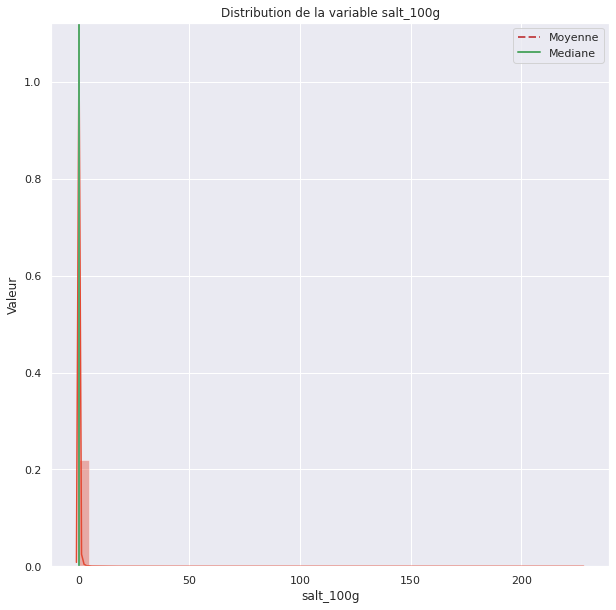

--------------------
sodium_100g
var:
 1.2452830437854323
std:
 1.1159225079661366
Skewness:
 38.992371807689935
kurtosis:
 2008.9212223919687


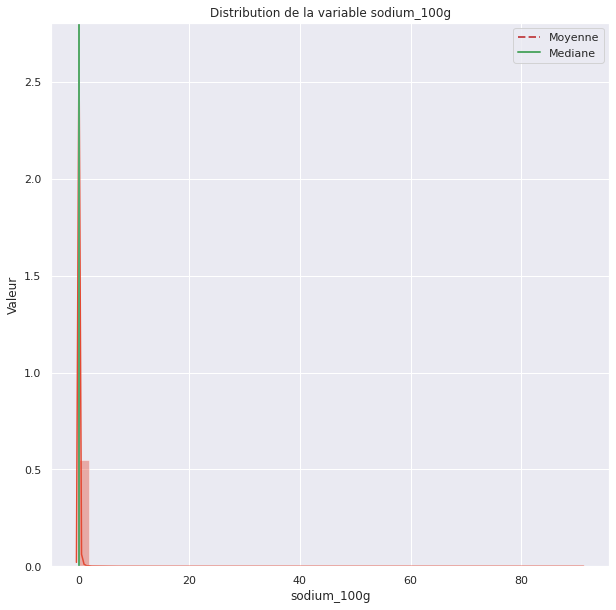

--------------------
nutrition-score-fr_100g
var:
 64.83735796177844
std:
 8.052164799715568
Skewness:
 0.709771231443266
kurtosis:
 -0.32788155347298353


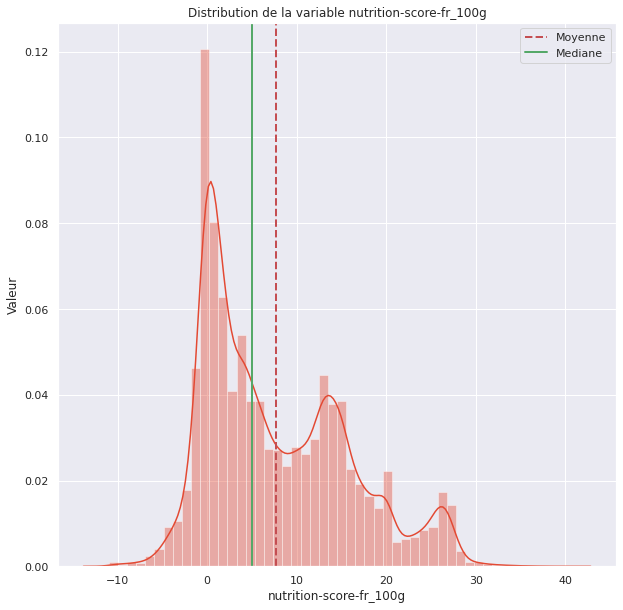

In [13]:
distribution(data)

### Conclusion 

**Rappel**: l'imputation des valeurs manquantes a introduit un biais dans nos variables, et donc leur distribution.

**Analyse**:
L'analyse de la distribution nous indique qu'aucune de nos variables ne suit la loi normale (On sait que le coefficient d'asymétrie vaut zéro pour toute loi normale, tandis que le coefficient d'aplatissement vaut 3 (0 si normalisé)). 
Cependant, le nombre d'individus de notre échantillon étant grand (75816), on considère que nos distributions tendent vers la loi normale (loi des grands nombres).

Les variable sugars_100g et carbohydrates_100g ont un distribution bimodale ce qui pourrait nous indiqué une corrélation entre ces variables.

# Anayses Univariées et Multivariées
**Les analyses univariées et multivariées permettent de préciser la relation entre deux variables**

## Relation "nutriscore"

### Nutriscore quali/quanti
La première relation que nous souhaitons analyser **nutriscore_grade** - **nutriscore_score**:
- Une variable est numérique et l’autre qualitative nous utiliserons l'Anova (analyse de variance)

H0: Egalité des moyennes des **nutriscore_grade** en fonction du **nutriscore_score**

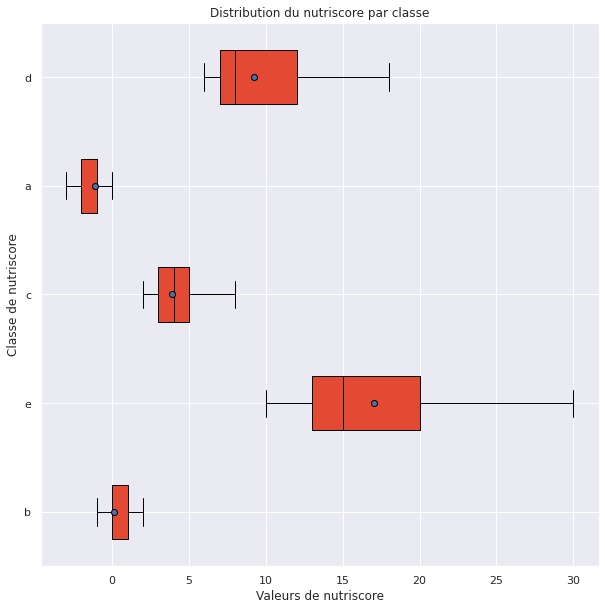

In [20]:
X = "nutriscore_grade" # qualitative
Y = "nutriscore_score" # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'b'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("Classe de nutriscore")
plt.xlabel("Valeurs de nutriscore")
plt.title("Distribution du nutriscore par classe")
plt.savefig("Relation_Nutriscore.png", transparent=True)
plt.show()

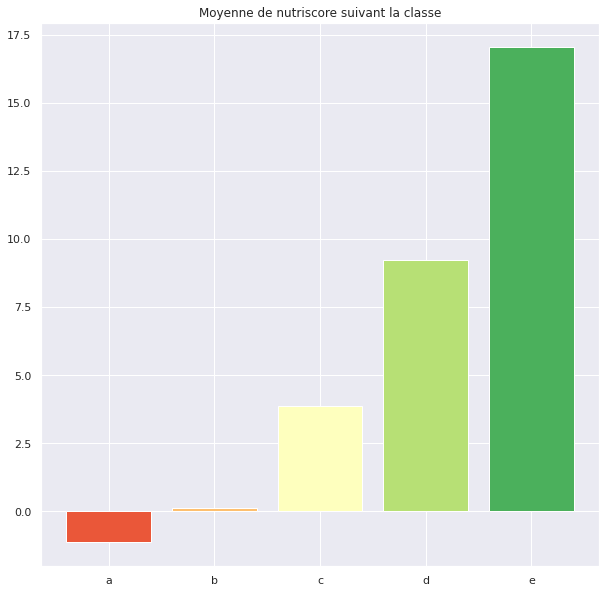

In [21]:
nutri_grade = data.loc[:,['nutriscore_grade', 'nutriscore_score']].groupby('nutriscore_grade').agg(['mean', 'count'])

plt.title('Moyenne de nutriscore suivant la classe')
plt.bar(nutri_grade.index, nutri_grade['nutriscore_score']['mean'], color= sns.color_palette("RdYlGn", 5))
plt.savefig("Relation_Nutriscore_2.png", transparent=True)
plt.show()

Graphiquement nous distinguons nos différentes classes: a, b, c, d et e.
Chacune de nos classes ont une moyenne différentes et des valeurs différentes.

In [22]:
eta_squared(data[X],data[Y])

0.8088426405759684

#### Conclusion 

Eta carré de nos variables X et Y étant proche de 0.85 cela signifie que les moyennes par classes sont très différentes. 

**Nous pouvons rejeter l'hypothése H0 : il existe donc une relation de corrélation entre les variables Y et X (nutriscore_grade - nutriscore_score).**

### Visualisation du nuage de points nutriscore

Text(0.5, 1.0, 'Relation entre les différentes variables nutriscores')

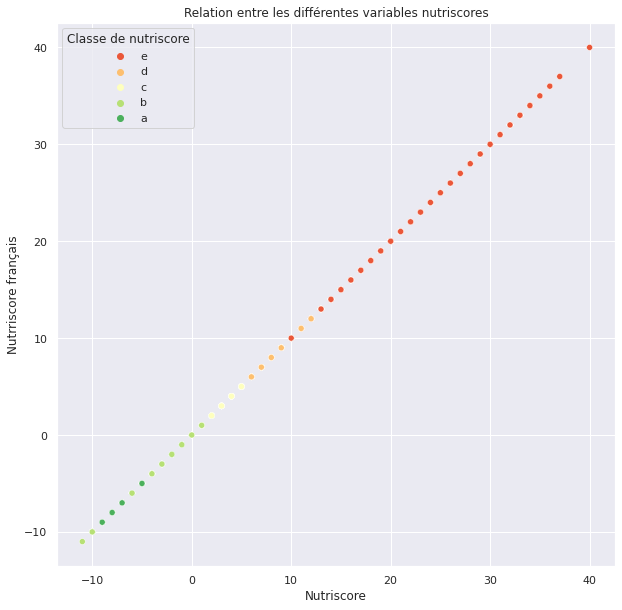

In [30]:
sns.scatterplot(x=data['nutriscore_score'], 
                y=data['nutrition-score-fr_100g'], 
                hue=data['nutriscore_grade'],
                hue_order=['e','d','c','b','a'],
                legend='full',
                palette=sns.color_palette("RdYlGn", 5))

plt.ylabel("Nutrriscore français")
plt.xlabel("Nutriscore")
plt.title("Distribution du nutriscore par classe")
plt.legend(title='Classe de nutriscore')
plt.savefig("Relation_Nutriscore_3.png", transparent=True)
plt.title('Relation entre les différentes variables nutriscores')

#### Conclusion 

Nous pouvons voir graphiquement que le nutriscore et le nutriscore fr suivent une courbe linéaire ils sont donc bien corrélé.

Il en va de même pour le nutriscore_grade qui qu'en à lui voit sa couleur changé en fonction des valeur des 2 autres nutriscore.

## Relation nutriscore-label

### Les Labels eco/bio tendent vers un meilleur nutriscore ?

In [31]:
df_label_ecobio = data[(data["labels_en"].str.contains("bio|eco")==True)]
df_label_ecobio

,product_name,categories_tags,labels_en,countries_en,additives_n,nutriscore_score,nutriscore_grade,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
552,Leche de coco en polvo liofilizada,"en:plant-based-foods-and-beverages,en:beverage...","Organic,Vegetarian,EU Organic,No gluten,Vegan,...",Spain,0.0,21.0,e,Laits,650.0,2720.0,50.0,50.0,30.0,10.0,0.0,10.0,0.3000,0.12000,21.0
1161,Chocolate Football Game,"en:snacks,en:sweet-snacks,en:confectioneries,e...","Not advised for specific people,Not recommende...",France,1.0,26.0,e,Laits,563.0,2356.0,32.6,20.0,58.8,58.8,1.6,7.7,0.2000,0.08000,26.0
1458,Gelée D'Aloe Vera - 473 ML - Lily of the Desert,"en:plant-based-foods-and-beverages,en:beverage...","Not advised for specific people,Not advised fo...",France,4.0,1.0,b,Boissons_non_sucrées,6.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0424,0.01696,1.0
7811,Bio Ingwer Kurkuma Shot,"en:plant-based-foods-and-beverages,en:beverage...",100-direktsaft-bio,Germany,0.0,-1.0,b,Boissons_à_base_de_fruits,32.0,136.0,0.5,0.1,5.8,5.7,0.0,0.5,0.0100,0.00400,-1.0
7923,Pomegranate Green Tea,"en:plant-based-foods-and-beverages,en:beverage...","Made in Germany,fr:eco-emballages","Austria,Belgium,France,Switzerland",2.0,7.0,d,NaN,21.0,88.0,0.0,0.0,5.0,4.9,0.0,0.0,0.0000,0.00000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43180,Yaourt Nature,"en:dairies,en:desserts,en:fermented-foods,en:f...","Organic,EU Organic,EU Agriculture,FR-BIO-01,Gr...",France,0.0,1.0,b,Laits,66.0,276.0,3.6,2.2,5.0,4.8,0.0,3.5,0.1300,0.05200,1.0
43833,Pure Leaf Thé Noir Bio Earl Grey 15 Sachets,"fr:rainforest-alliance,fr:the-noir-bio","Organic,Non-EU Agriculture,Green Dot,PEFC,Rain...",France,0.0,0.0,b,Thés,4.0,17.0,0.0,0.0,0.5,0.5,0.0,0.5,0.0000,0.00000,0.0
44856,Aloe Vera Lemon,"en:plant-based-foods-and-beverages,en:beverage...","Organic,Green Dot,fr:th-bio-04",France,1.0,6.0,d,Boissons_non_sucrées,28.0,117.0,0.0,0.0,6.6,2.5,0.2,0.2,0.0000,0.00000,6.0
45197,Bio-Milch,"en:dairies,en:milks","Organic,EU Organic,AT-BIO-902,de:ama-bio-siegel",Austria,0.0,2.0,b,Laits,68.0,285.0,4.0,2.7,4.8,4.8,0.0,3.2,0.1300,0.05200,2.0


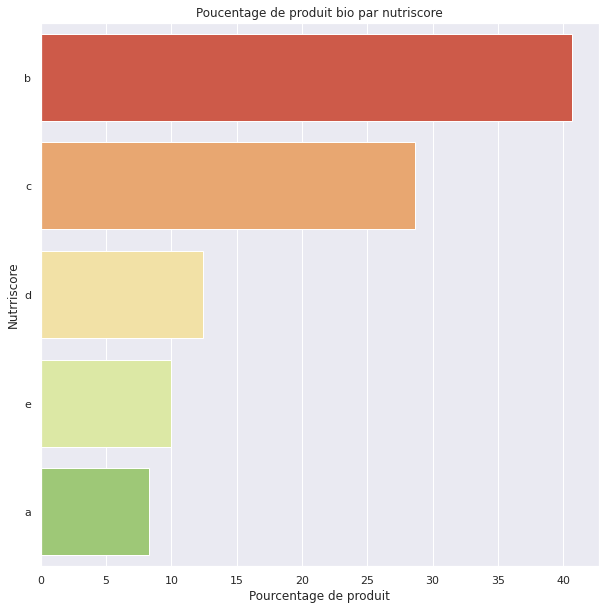

In [32]:
nutri_pc = df_label_ecobio.nutriscore_grade.value_counts() * 100 / df_label_ecobio.nutriscore_grade.count()

sns.barplot(x=nutri_pc, y=nutri_pc.index)
plt.xlabel('Pourcentage de produit');
plt.ylabel("Nutrriscore")
plt.title("Poucentage de produit bio par nutriscore")
plt.savefig("Relation_label.png", transparent=True)

#### Conclusion 

40% des produits ont un bon nutriscore (b) et seulement 22% environ ont un mauvais nutriscore (d ou e), il est possible que les labels ont une influence sur le nutriscore

### Les variables nutriscore_grade et labels_en sont-elles indépandantes ?

La seconde relation que nous souhaitons analyser **nutriscore_grade** - **labels_en**:
- Deux variables qualitatives nous utiliserons Chi-2

H0: Le **nutriscore_grade** est indépandant du **labels_en**

In [131]:
df_nutri_label = data[(data["labels_en"].str.contains("#")==False)]

In [132]:
df_nutri_label.labels_en.value_counts().head(15)

Organic                                         2886
No preservatives                                 467
No added sugar                                   438
Organic,EU Organic,AB Agriculture Biologique     417
Gluten-free                                      408
Green Dot                                        401
Made in France                                   310
Vegetarian,Vegan                                 291
No lactose                                       284
No colorings,No preservatives                    223
FSC                                              209
No colorings                                     174
Sustainable farming,UTZ Certified                149
No gluten                                        137
Organic,EU Organic,FR-BIO-01                     125
Name: labels_en, dtype: int64

In [133]:
df_nutri_label = df_nutri_label[df_nutri_label['labels_en'].map(df_nutri_label['labels_en'].value_counts()) > 124]

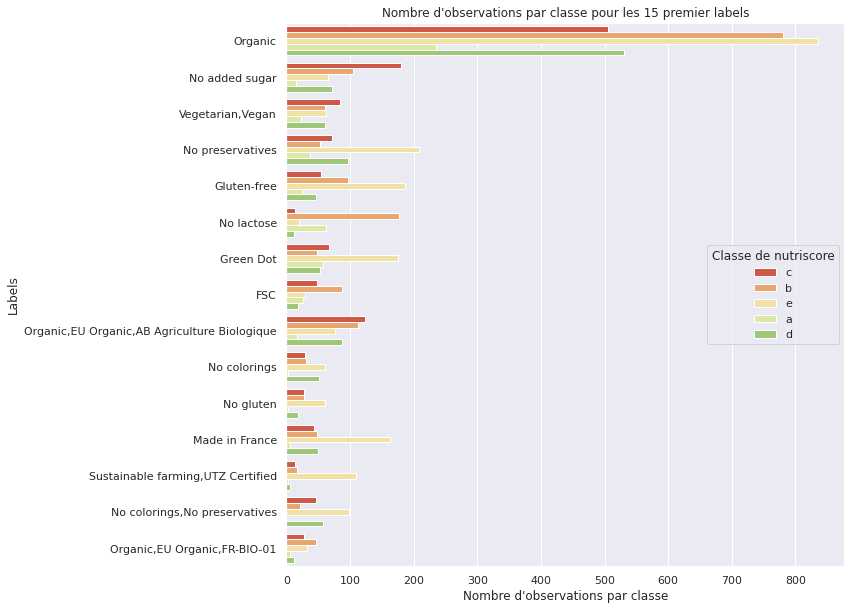

In [136]:
sns.countplot(y='labels_en', hue='nutriscore_grade', data=df_nutri_label)

plt.ylabel("Labels")
plt.xlabel("Nombre d'observations par classe")

plt.title("Nombre d'observations par classe pour les 15 premier labels")
plt.legend(title='Classe de nutriscore')

plt.savefig("Relation_label_2.png", transparent=True)
plt.show()

Nous pouvons conclure graphiquement que certains label comme:
- 'No lactose'
- 'Sustainable farming'
influence grandement le nutriscore.


Cependant d'autre label comme 'Organic' n'influence pas le nutriscore.
Un test statistique du Chi-2 devrait nous aider à repondre à notre question.

#### Tableau de contingence

In [137]:
crosstab = pd.crosstab(df_nutri_label["labels_en"], 
                       df_nutri_label["nutriscore_grade"])

crosstab

nutriscore_grade,a,b,c,d,e
labels_en,,,,,
FSC,26,87,48,18,30
Gluten-free,24,97,55,46,186
Green Dot,57,48,67,53,176
Made in France,6,48,43,50,163
No added sugar,15,105,180,72,66
No colorings,2,31,29,51,61
"No colorings,No preservatives",0,22,46,57,98
No gluten,3,28,28,18,60
No lactose,62,177,13,12,20


In [138]:
#chi2_contingency: The test statistic
#p: The p-value of the test
#dof: Degrees of freedom
#expected: The expected frequencies, based on the marginal sums of the table

c, p, dof, expected = chi2_contingency(crosstab)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.9200317384734522e-209
Dependent (reject H0)


#### Conclusion 

p correspond à la probabilité de voir l'effet apparent si l'hypothèse H0 est vraie. 

Si la valeur p est inférieure ou égale à un seuil(0,05), nous rejetons l'hypothèse nulle.

Si la valeur p est faible, l'effet est dit statistiquement significatif, ce qui signifie qu'il est peu probable qu'il soit le fruit du hasard. 

Par conséquent, nous pouvons dire que l'effet est plus susceptible d'apparaître dans une population plus large.

**Nous pouvons rejeter l'hypothése H0 : il existe donc une dépendance entre les variables nutriscore_grade et label_en.**

## Relation nutriscore-categorie

### Quelle est la relation entre la catégorie et les nutriments, certaine catégorie de boissons sont-elles plus calorique ou ont un meilleurs nutriscore ?

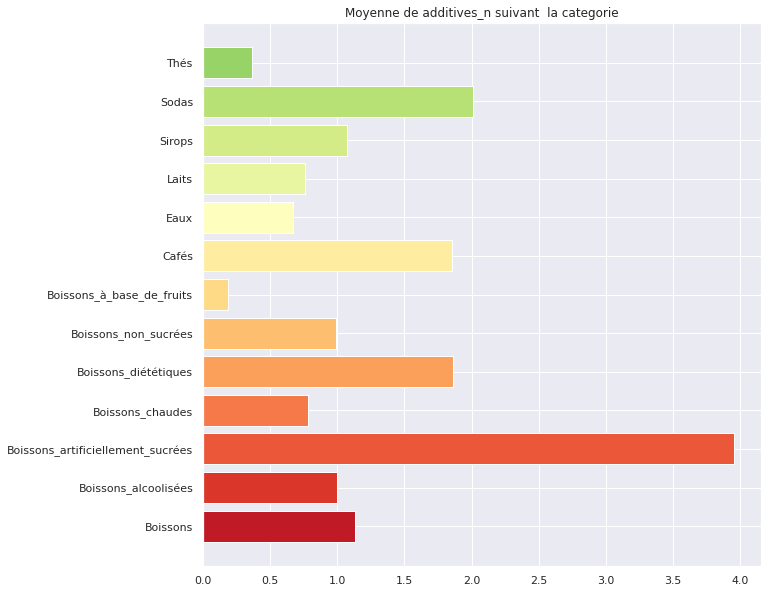

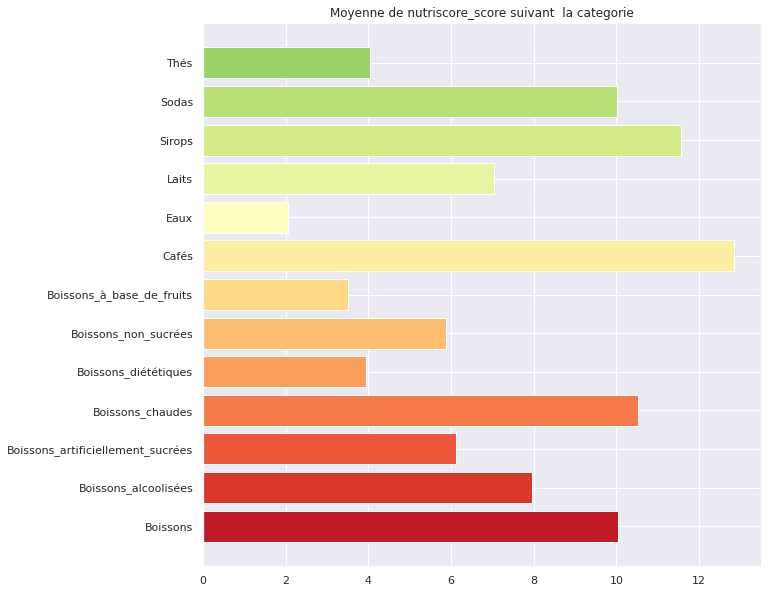

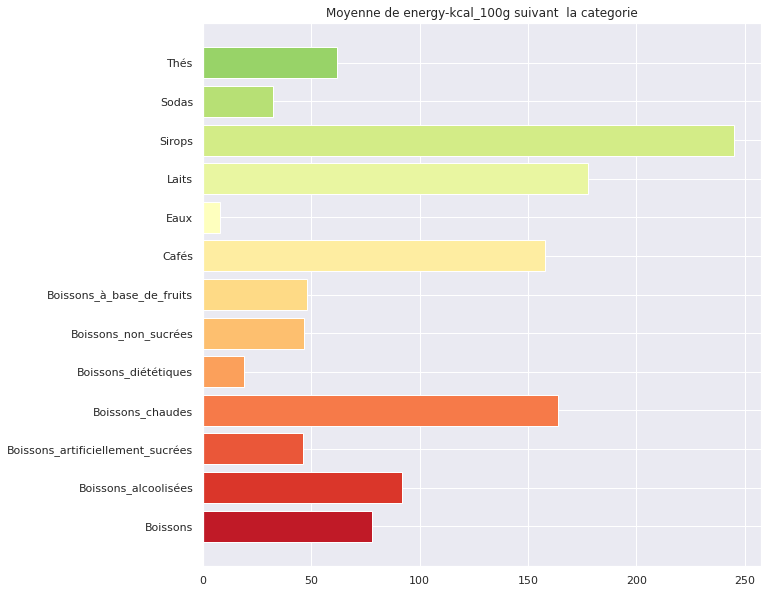

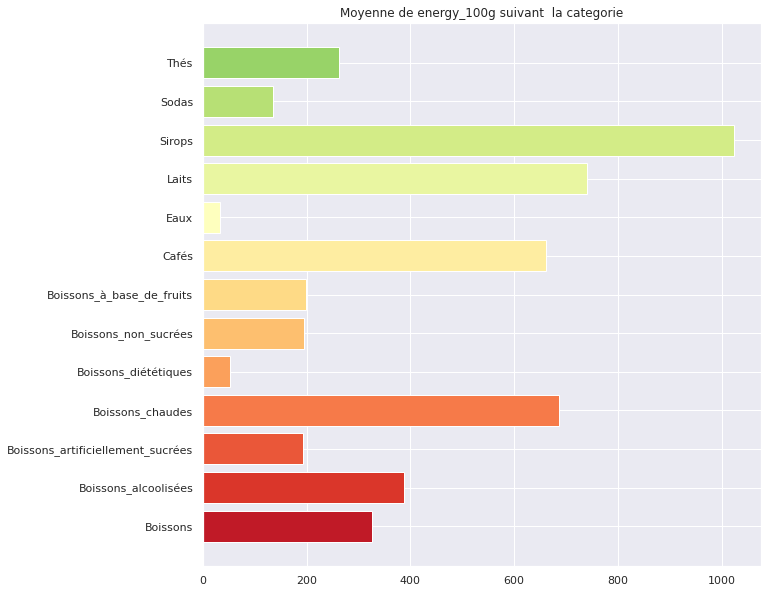

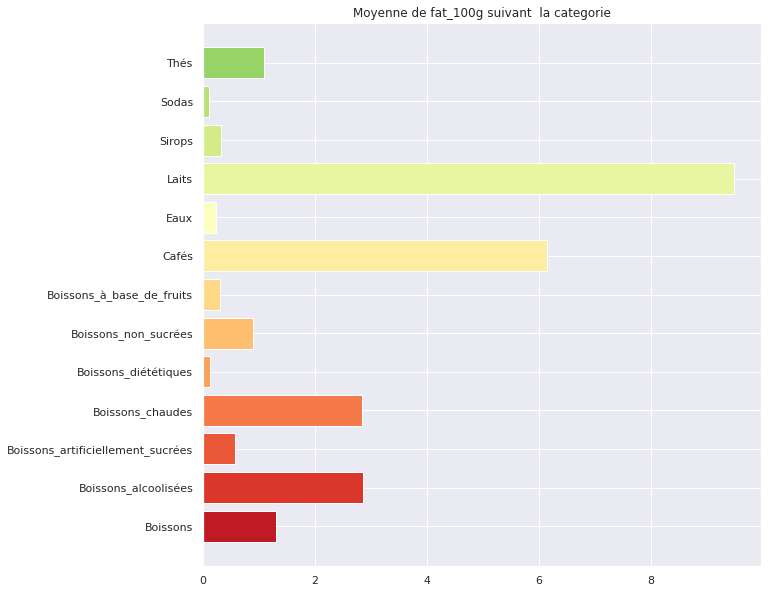

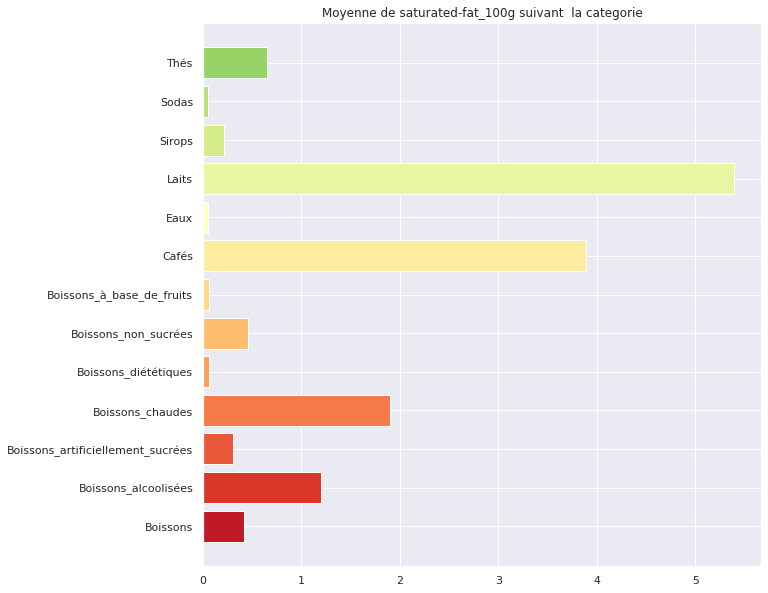

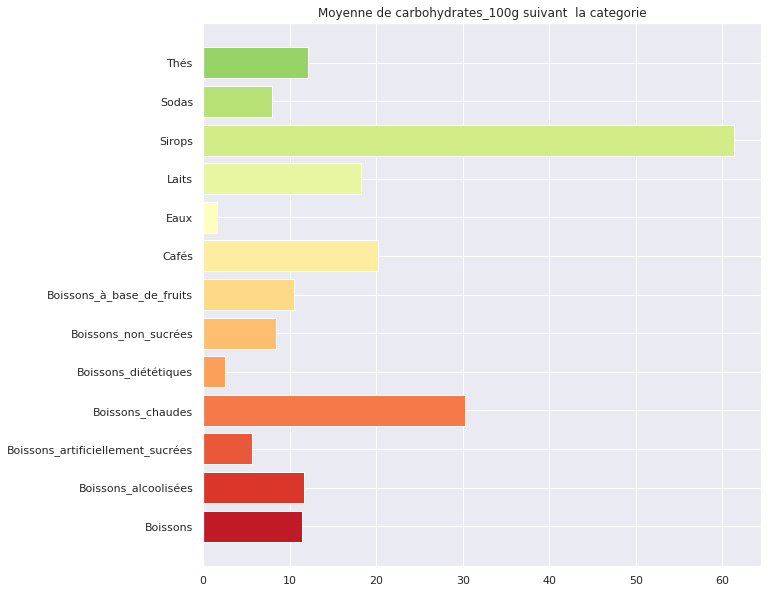

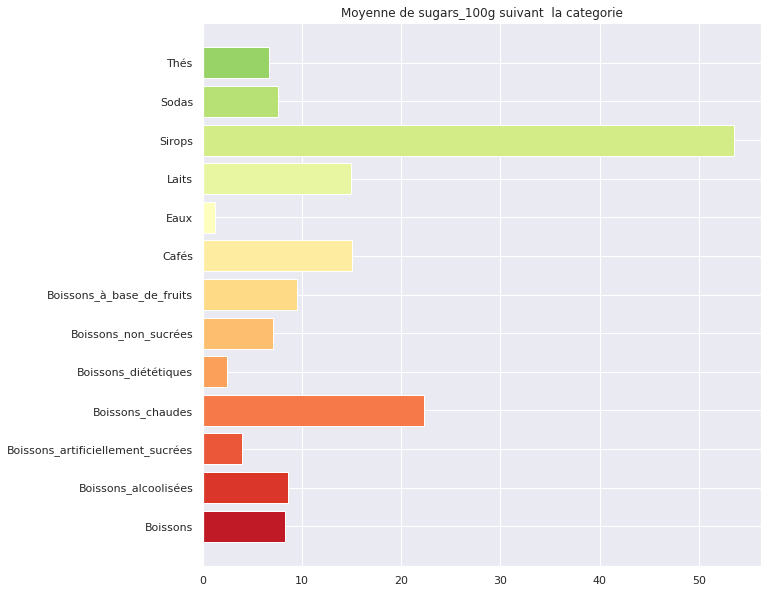

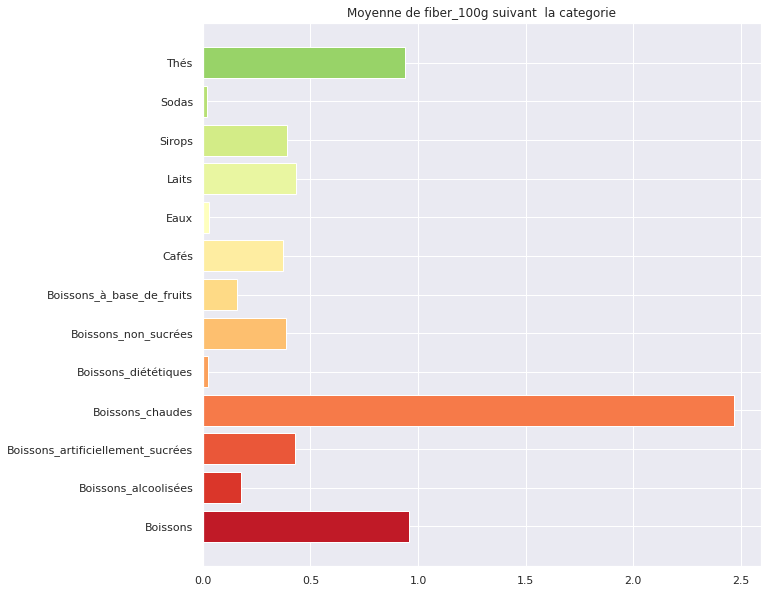

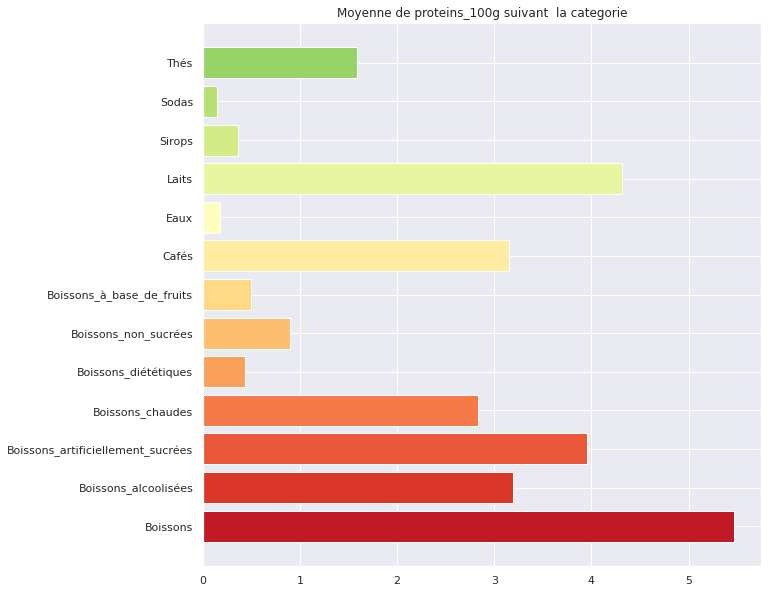

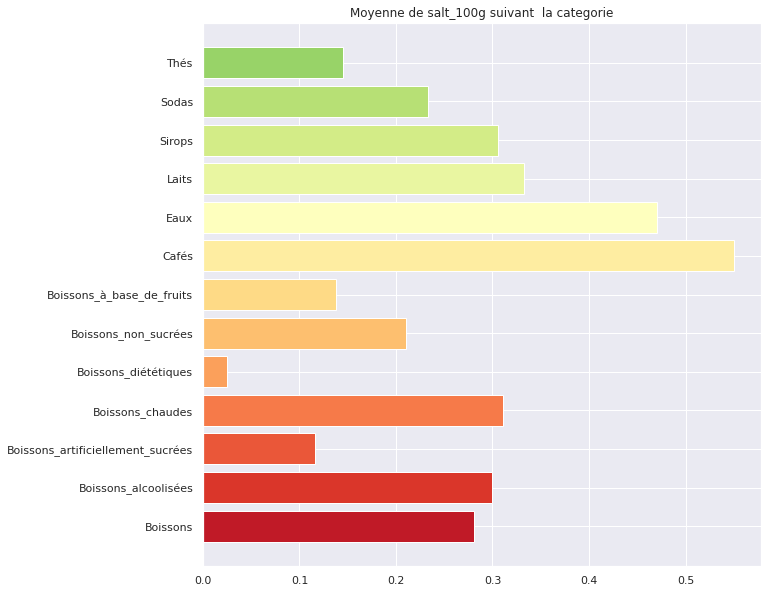

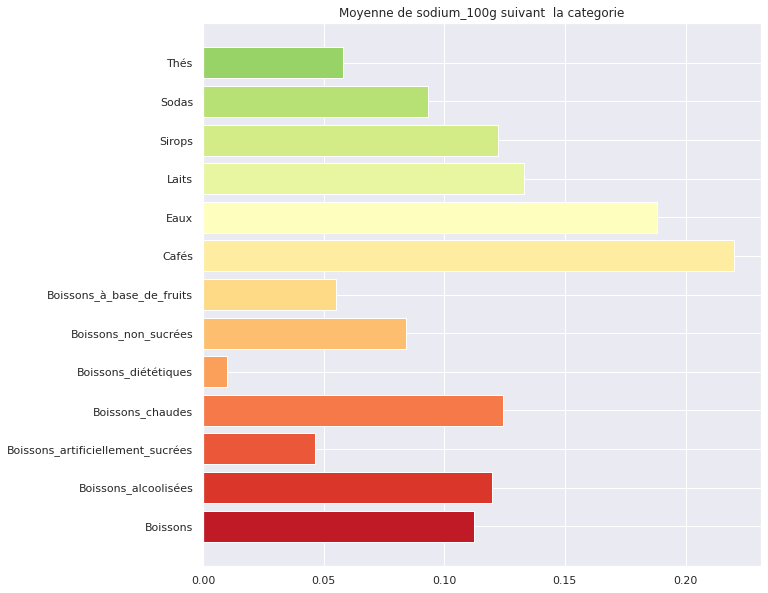

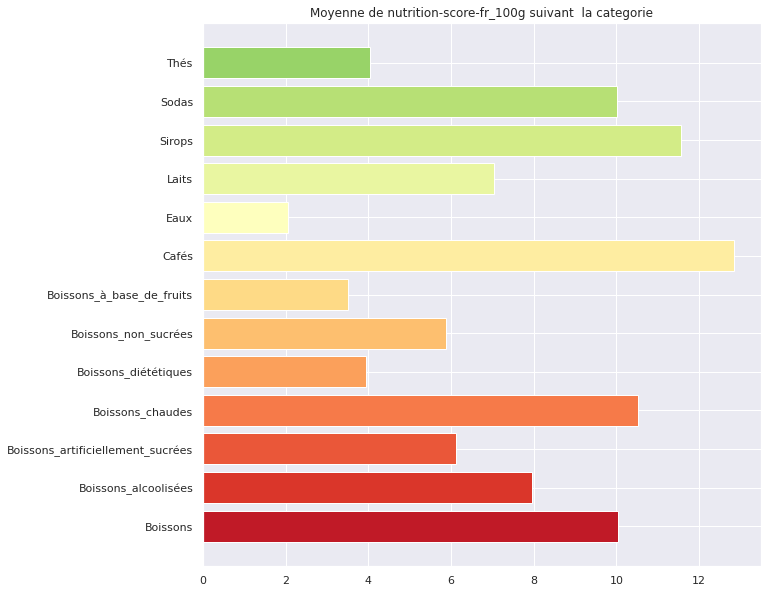

In [140]:
for column in data.select_dtypes(exclude='object'):    
    nutri_grade=data.loc[:,['main_category_en', column]].groupby('main_category_en').agg(['mean', 'count'])
    
    plt.title('Moyenne de '+ str(column)+' suivant  la categorie')
    plt.barh(nutri_grade.index, nutri_grade[column]['mean'], color= sns.color_palette("RdYlGn", 17))
    
    plt.savefig("Moyenne de "+ str(column)+" suivant  la categorie.png", transparent=True)
    plt.show()

#### Conclusion

**Additifs**:
- Les sodas, dehydrated beverages et artificially sweetened beverages ont en moyennes plus d'additifs

**Nutriscore**:
- Certaines catégorie ont en effet un bon nutriscore comme le teas et waters cependants nous ne pouvons emettre plus de conclusions graphique


**Nutriments**:
- energy et energy-kcal
    - Les syrups, milks instant beverages et dehydrated beverages sont plus caloriques

- fat/satureted_fat
    - Les boissons qui ont en moyennes le plus de fat sont les milks et dehydrated beverages

    
- carbohydrates/sugars
    - Les boissons qui ont en moyennes le plus de carbohydrates sont les syrups et dehydrated beverages

    
- fiber
    - Les boissons qui ont en moyennes le plus de fiber sont les teas, coffees, hot et dehydrated beverages

- salt
    - Les boissons qui ont en moyennes le plus de salt sont les alcoholic et dehydrated beverages

**Les dehydrated beverages sont des produits très nutritifs en moyenne**

### Quelle est la relation entre la catégorie et le nutriscore ?

La troisième relation que nous souhaitons analyser **nutriscore_grade** - **main_category_en**:
- Deux variables qualitatives nous utiliserons Chi-2

H0: Le **nutriscore_grade** est indépandant du **main_category_en**
    
Cette analyse est importante pour notre application car elle permettra d'avoir une idée de nutriscore en fonction de la catégorie

In [142]:
df_nutri_categ = data[(data["main_category_en"].str.contains("#")==False)]

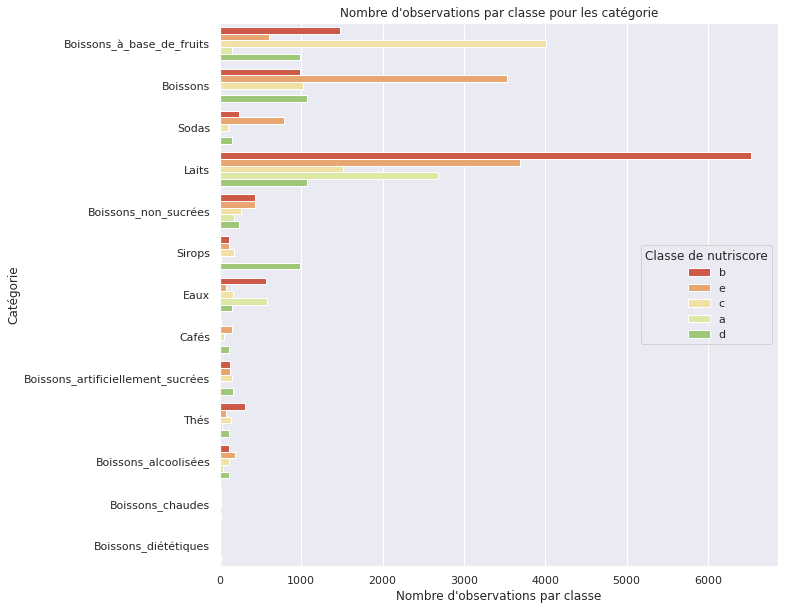

In [143]:
sns.countplot(y='main_category_en', hue='nutriscore_grade', data=df_nutri_categ)

plt.ylabel("Catégorie")
plt.xlabel("Nombre d'observations par classe")

plt.title("Nombre d'observations par classe pour les catégorie")
plt.legend(title='Classe de nutriscore')

plt.savefig("Relation_categ.png", transparent=True)
plt.show()

Nous pouvons conclure graphiquement que certaines catégorie comme:
- 'juices'
- 'Sweetened beverages'
- 'Syrups'
- ou encore 'Sodas'
influence grandement le nutriscore.


Cependant d'autre label comme 'Milks' et  'Unsweetened beverages' n'influence pas le nutriscore.
Un test statistique du Chi-2 devrait nous aider à repondre à notre question.

#### Tableau de contingence

In [144]:
crosstab_2 = pd.crosstab(df_nutri_categ["main_category_en"], 
                       df_nutri_categ["nutriscore_grade"])

crosstab_2

nutriscore_grade,a,b,c,d,e
main_category_en,,,,,
Boissons,0,982,1021,1074,3532
Boissons_alcoolisées,32,115,109,109,191
Boissons_artificiellement_sucrées,1,121,145,158,122
Boissons_chaudes,1,14,7,7,17
Boissons_diététiques,0,6,6,9,1
Boissons_non_sucrées,178,427,260,236,426
Boissons_à_base_de_fruits,152,1473,4013,980,608
Cafés,1,14,48,117,143
Eaux,583,570,159,150,73


In [145]:
c, p, dof, expected = chi2_contingency(crosstab_2)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


#### Conclusion 
La p value est bien dessous de alpha pré définie.

**Nous pouvons rejeter l'hypothése H0 : il existe donc une dépendance entre les variables nutriscore_grade et main_category_en.**

## Relation nutriscore-additifs

### Les produits avec plus d'additifs tendent vers un mauvais nutriscore ?

Nous avons vu précédement que les sodas, dehydrated beverages et artificially sweetened beverages ont en moyennes plus d'additifs.

Nous voulons savoir si le nombre additifs entraine un plus mauvais nutriscore

In [158]:
df_add = data[(data["additives_n"]>5)]

AttributeError: 'JointGrid' object has no attribute 'legend'

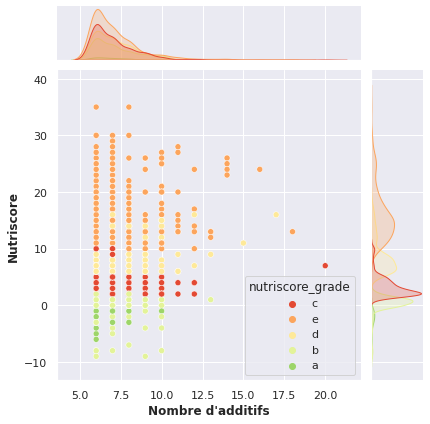

In [160]:
j = sns.jointplot(x='additives_n', y='nutriscore_score', hue="nutriscore_grade", data=df_add, size=6)

j.ax_joint.set_ylabel('Nutriscore', fontweight='bold')
j.ax_joint.set_xlabel("Nombre d'additifs", fontweight='bold')
j.legend(ti)

plt.suptitle("Distribution du nombre d'additifs suivant le nutriscore")
plt.subplots_adjust(top=0.90)

plt.savefig("Relation_add.png", transparent=True)
plt.show()

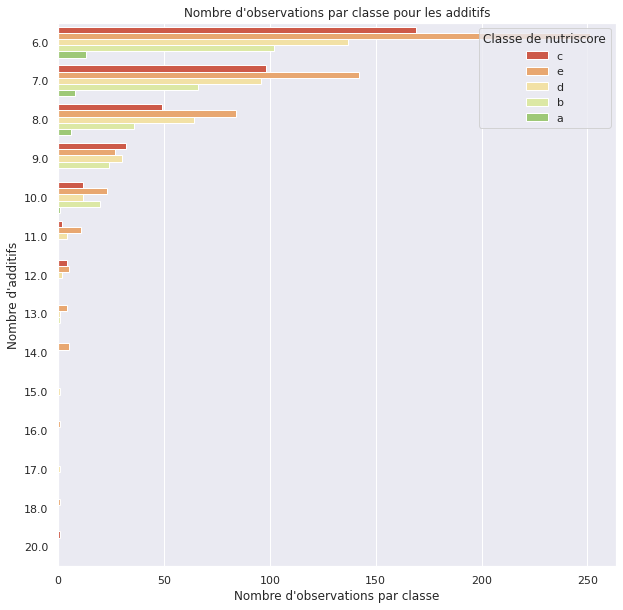

In [161]:
sns.countplot(y='additives_n', hue='nutriscore_grade', data=df_add)

plt.ylabel("Nombre d'additifs")
plt.xlabel("Nombre d'observations par classe")

plt.title("Nombre d'observations par classe pour les additifs")
plt.legend(title='Classe de nutriscore')

plt.savefig("Relation_add_2.png", transparent=True)

plt.show()

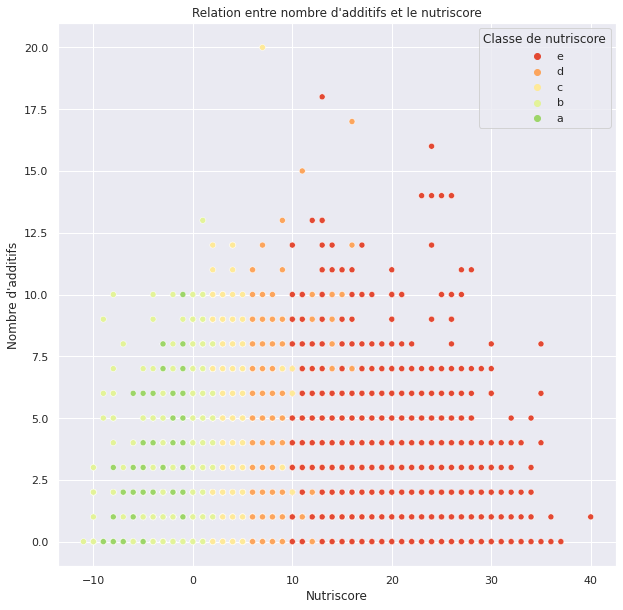

In [163]:
sns.scatterplot(x=data['nutriscore_score'], 
                y=data['additives_n'], 
                hue=data['nutriscore_grade'],
                hue_order=['e','d','c','b','a'],
                legend='full') 

plt.ylabel("Nombre d'additifs")
plt.xlabel("Nutriscore")
plt.legend(title='Classe de nutriscore')

plt.savefig("Relation_add_3.png", transparent=True)

plt.title("Relation entre nombre d'additifs et le nutriscore")
plt.show()

#### Conclusion

Les produits Avec 6 ou 7 additifs ont bien un nutriscore de c,d et e plus conscequent, cependant, nous ne pouvons pas conclure que le nombre d'additifs influe dans un sens le nutriscore.

Il faut pour cela analysé la qualité des différents additifs. En effet, un mauvais additifs pourrait influencé grandement le nutriscore, lorsque 4 additifs 'neutre' n'auraint pas d'influence.

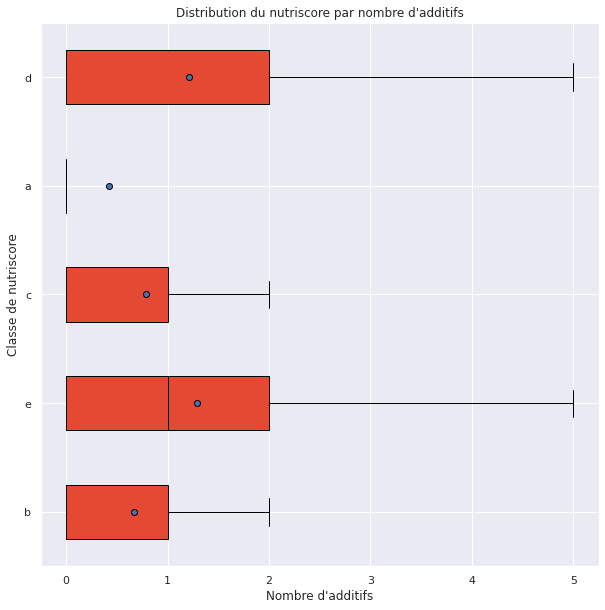

In [181]:
M = "nutriscore_grade" # qualitative
N = "additives_n" # quantitative

modalites = data[K].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[M]==m][N])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'b'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("Classe de nutriscore")
plt.xlabel("Nombre d'additifs")
plt.title("Distribution du nutriscore par nombre d'additifs")
plt.savefig("Relation_add_4.png", transparent=True)
plt.show()

In [179]:
eta_squared(data[M],data[N])

0.03199353447857865

#### Conclusion 

Eta carré de nos variables X et Y étant proche de 0 cela signifie que les moyennes par classes sont très proches. 

**Nous pouvons rejeter l'hypothése H0 : il n'existe pas de relation de corrélation entre les variables Y et X (nutriscore_grade - additives_n).**

### Relation nutriscore-nutriments

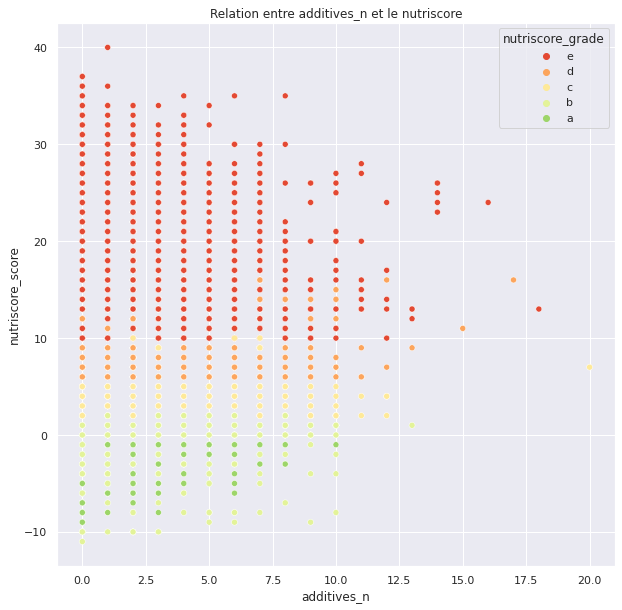

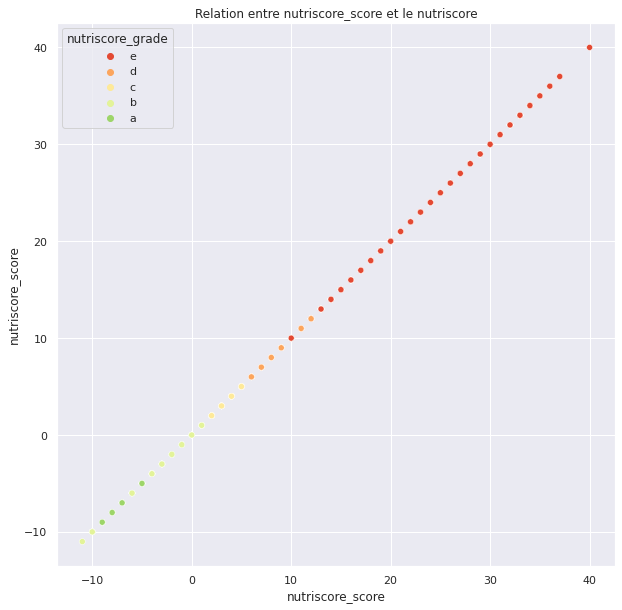

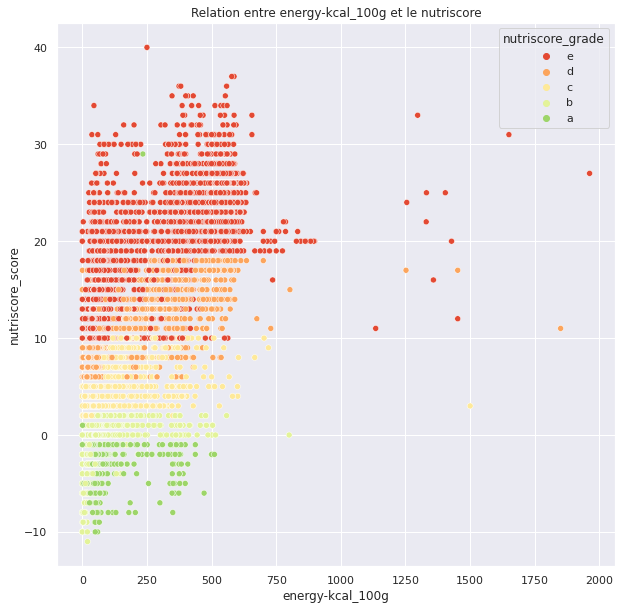

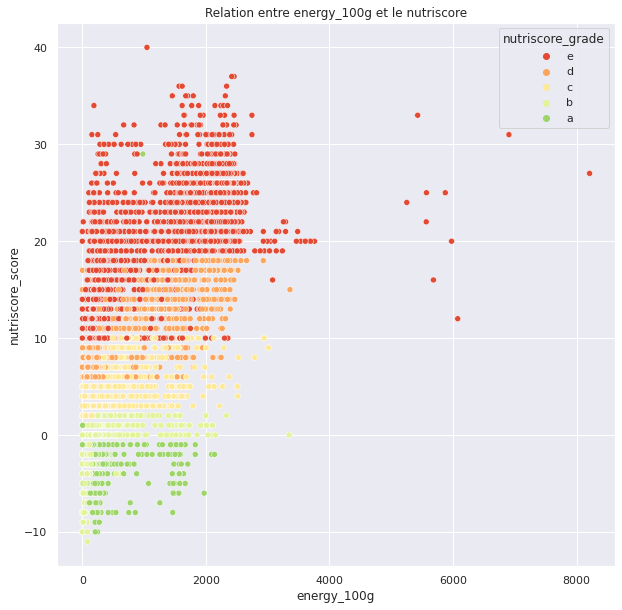

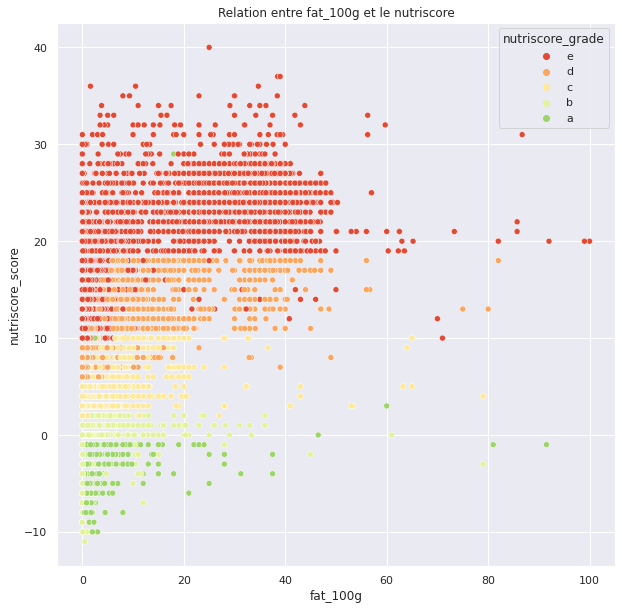

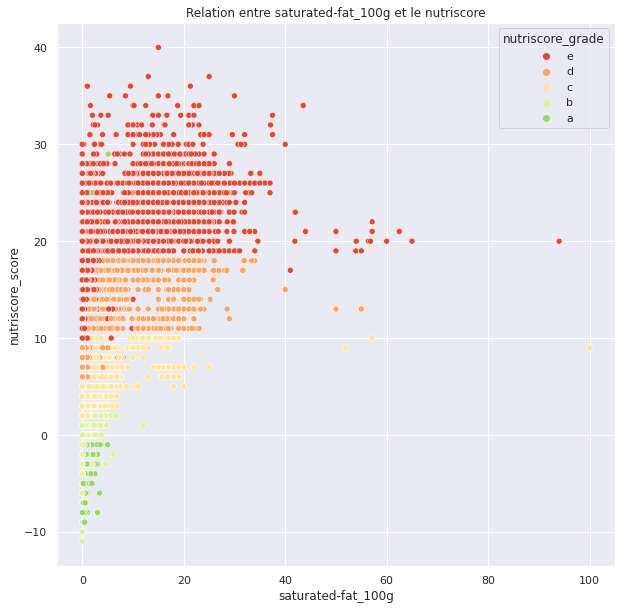

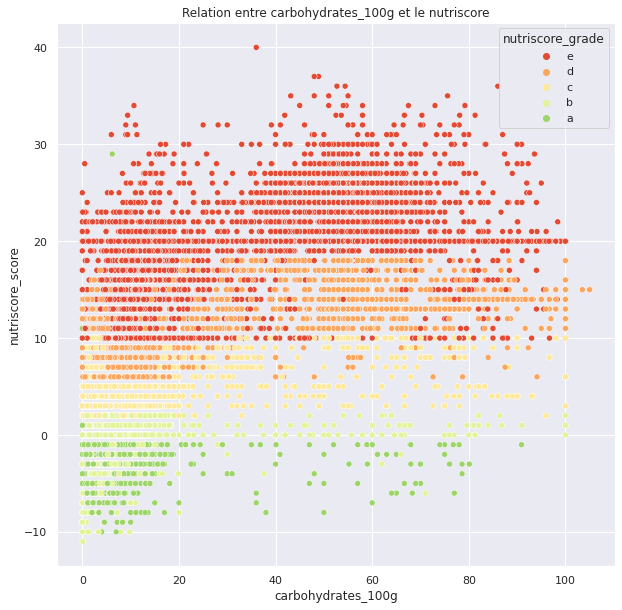

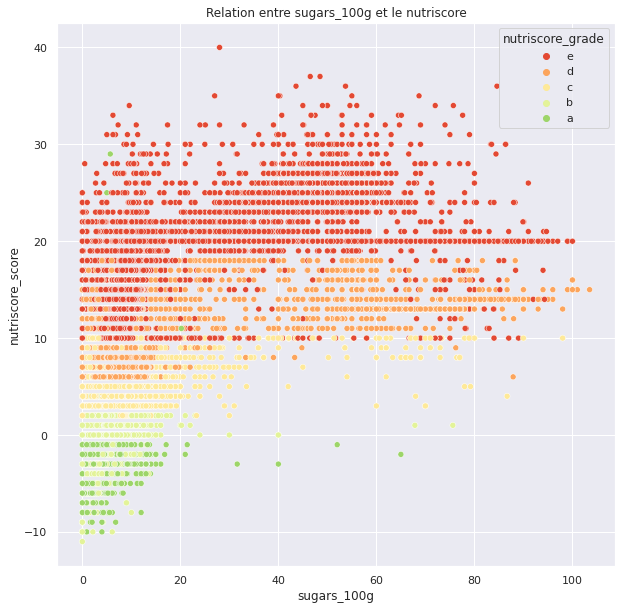

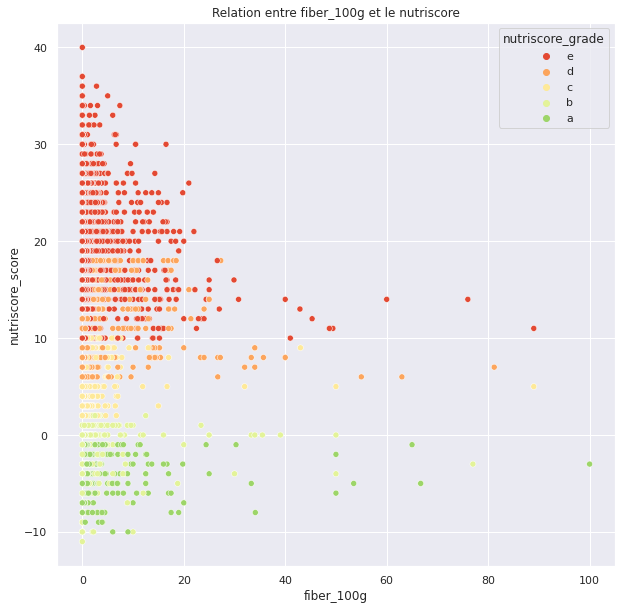

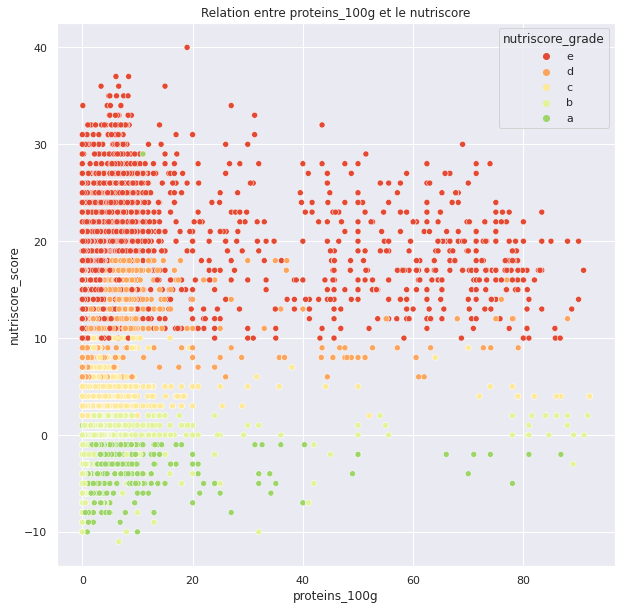

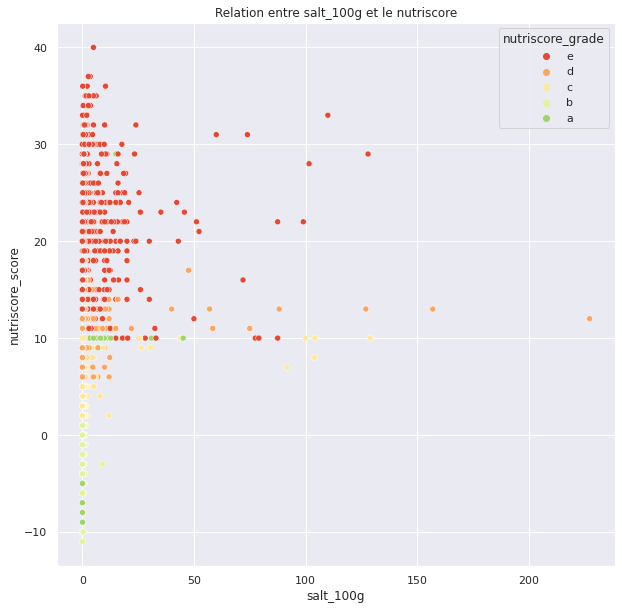

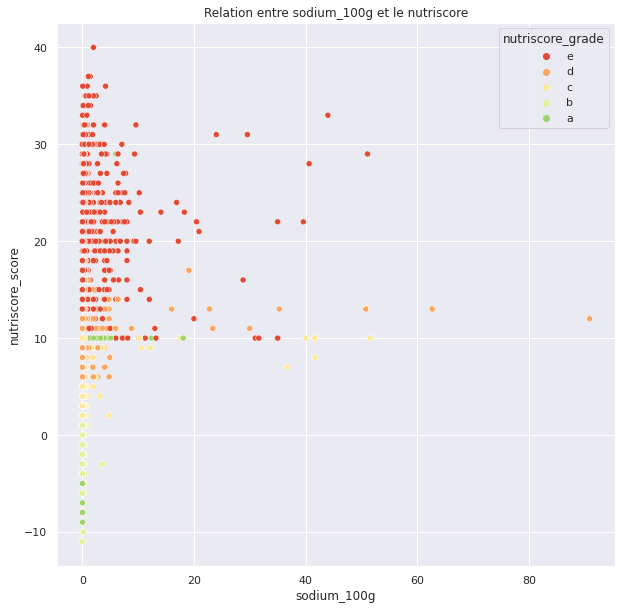

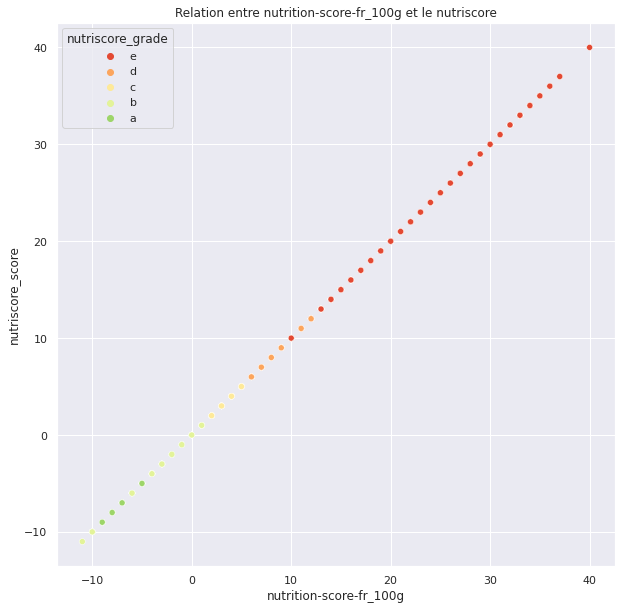

In [165]:
for column in data.select_dtypes(exclude='object'):    
    sns.scatterplot(x=data[column], 
                    y=data['nutriscore_score'], 
                    hue=data['nutriscore_grade'],
                    hue_order=['e','d','c','b','a'],
                    legend='full') 
    plt.title('Relation entre '+ str(column)+' et le nutriscore')
    plt.savefig('Relation entre '+ str(column)+' et le nutriscore.png', transparent=True)
    plt.show()

#### Conclusion

**Rappel: due à l'imputation de valeur lors du prétraitement des données celles-ci sont légérement biaisé**

- additives_n: voir précédemment

- energy-kcal_100g et energy_100g: Les produits ayant un fort taux calorique ont un mauvais nutriscore cependant certains produit peu calorique ont également un mauvais nutriscore.

- fat_100g: Les produits ayant un fort taux de fat ont un mauvais nutriscore cependant certains produit avec peu de fat ont également un mauvais nutriscore.

- saturated-fat_100g: On constate que les produit avec peu de saturated-fat ont un bon nutriscore

- carbohydrates_100g: Les produits ayant un fort taux de carbohydrates ont un mauvais nutriscore cependant certains produit avec peu de carbohydrates ont également un mauvais nutriscore.

- sugars_100g & fiber_100g & salt_100g:

**de manière générale la conclusion est la même les produits peu nutrtitifs ont tendance à être aussi bien bon comme mauvais en terme de nutriscore**


## Matrice des corrélation

**L'objectif est de vérifier la correlation entre la target et les variables utilisé pour le calcul du nutri-score de notre application, afin de répondre à notre précédente question: Quelle est la relation entre les nutriments et le nutriscore.**

Si la corrélation n'est pas confirmé alors notre calcul du nutriscore aura une une plus grande précision en utilisant ces variables ?

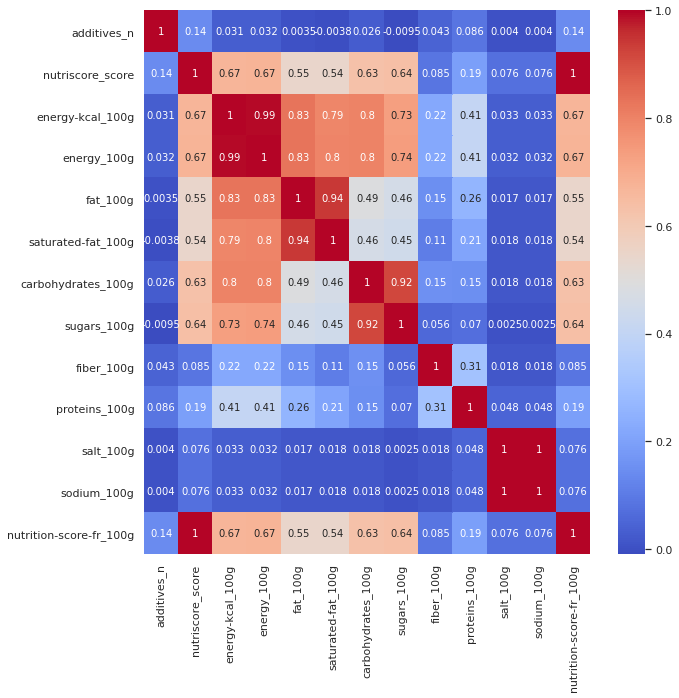

In [170]:
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.savefig('CorrMatrix1.png', transparent=True)

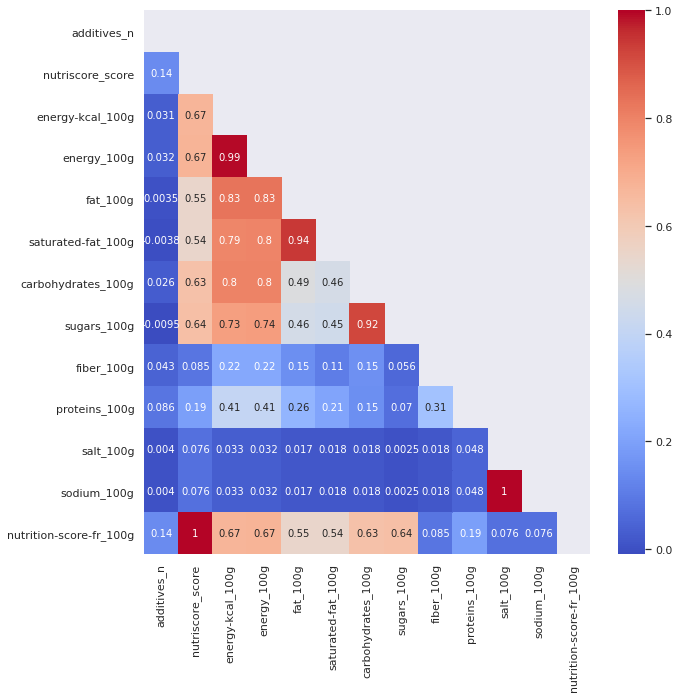

In [171]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, fmt='.2g',cmap= 'coolwarm', mask=matrix)
plt.savefig('CorrMatrix2.png', transparent=True)

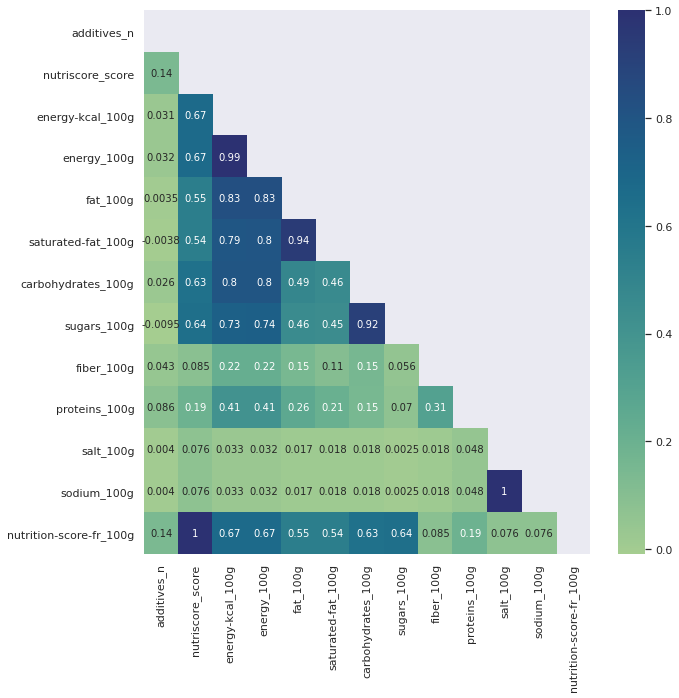

In [172]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, fmt='.2g',cmap= 'crest', mask=matrix)
plt.savefig('CorrMatrix3.png', transparent=True)

#### Conclusions

**Nutriscore**:
- Comme vu précdement dans un graphique le nutriscore est totalement corrélé au nutriscore_fr
- Les variables fat/satureted_fat et energy sont moyennement corrélé au nutriscore, mes variables sugars et fiber sont faiblement corrélé au nutriscore

**Additifs**:
- Le nombre d'additifs est très peu corrèlé à nos différents variable, **on peut donc infirmer l'utilisation de cette variable pour calcul du nutriscore actuel**

**Nutriments**:
- **energy et energy-kcal**
    - ces deux variable sont fortement corrélées entre elles
    - ces deux variables ont un corrélation moyenne avec fat/satureted_fat, sugars et carbohydrates
    - ces deux variables ont une corrélation faible avec le nutriscore

- **fat/satureted_fat**
    - correlation forte: un produit avec une forte présence de fat aura également une forte présence de satureted_fat

    
- **carbohydrates/sugars**
    - correlation forte: un produit avec une forte présence de carbohydrates aura également une forte présence de sugars
    
- **fiber**
    - correlation quasiment nulle avec les autres variables
        **on peut donc infirmer l'utilisation de cette variable pour calcul du nutriscore actuel**
    
- **salt**
    - correlation quasiment nulle avec les autres variables
        **on peut donc infirmer l'utilisation de cette variable pour calcul du nutriscore actuel**


Notre matrice de corrélation permet de nous indiqué que les variables fiber/salt et Additifs(nombre) ne sont pas corrélé avec le nutriscore, elle ne sont donc prise en compte dans le calcul du nutriscore actuel.

**Cependant ce test est sensible aux valeurs extrèmes un pairplot nous permettra de vérifier l'influence des valeur exceptionnelles**

### Pairplot: matrice des correlation

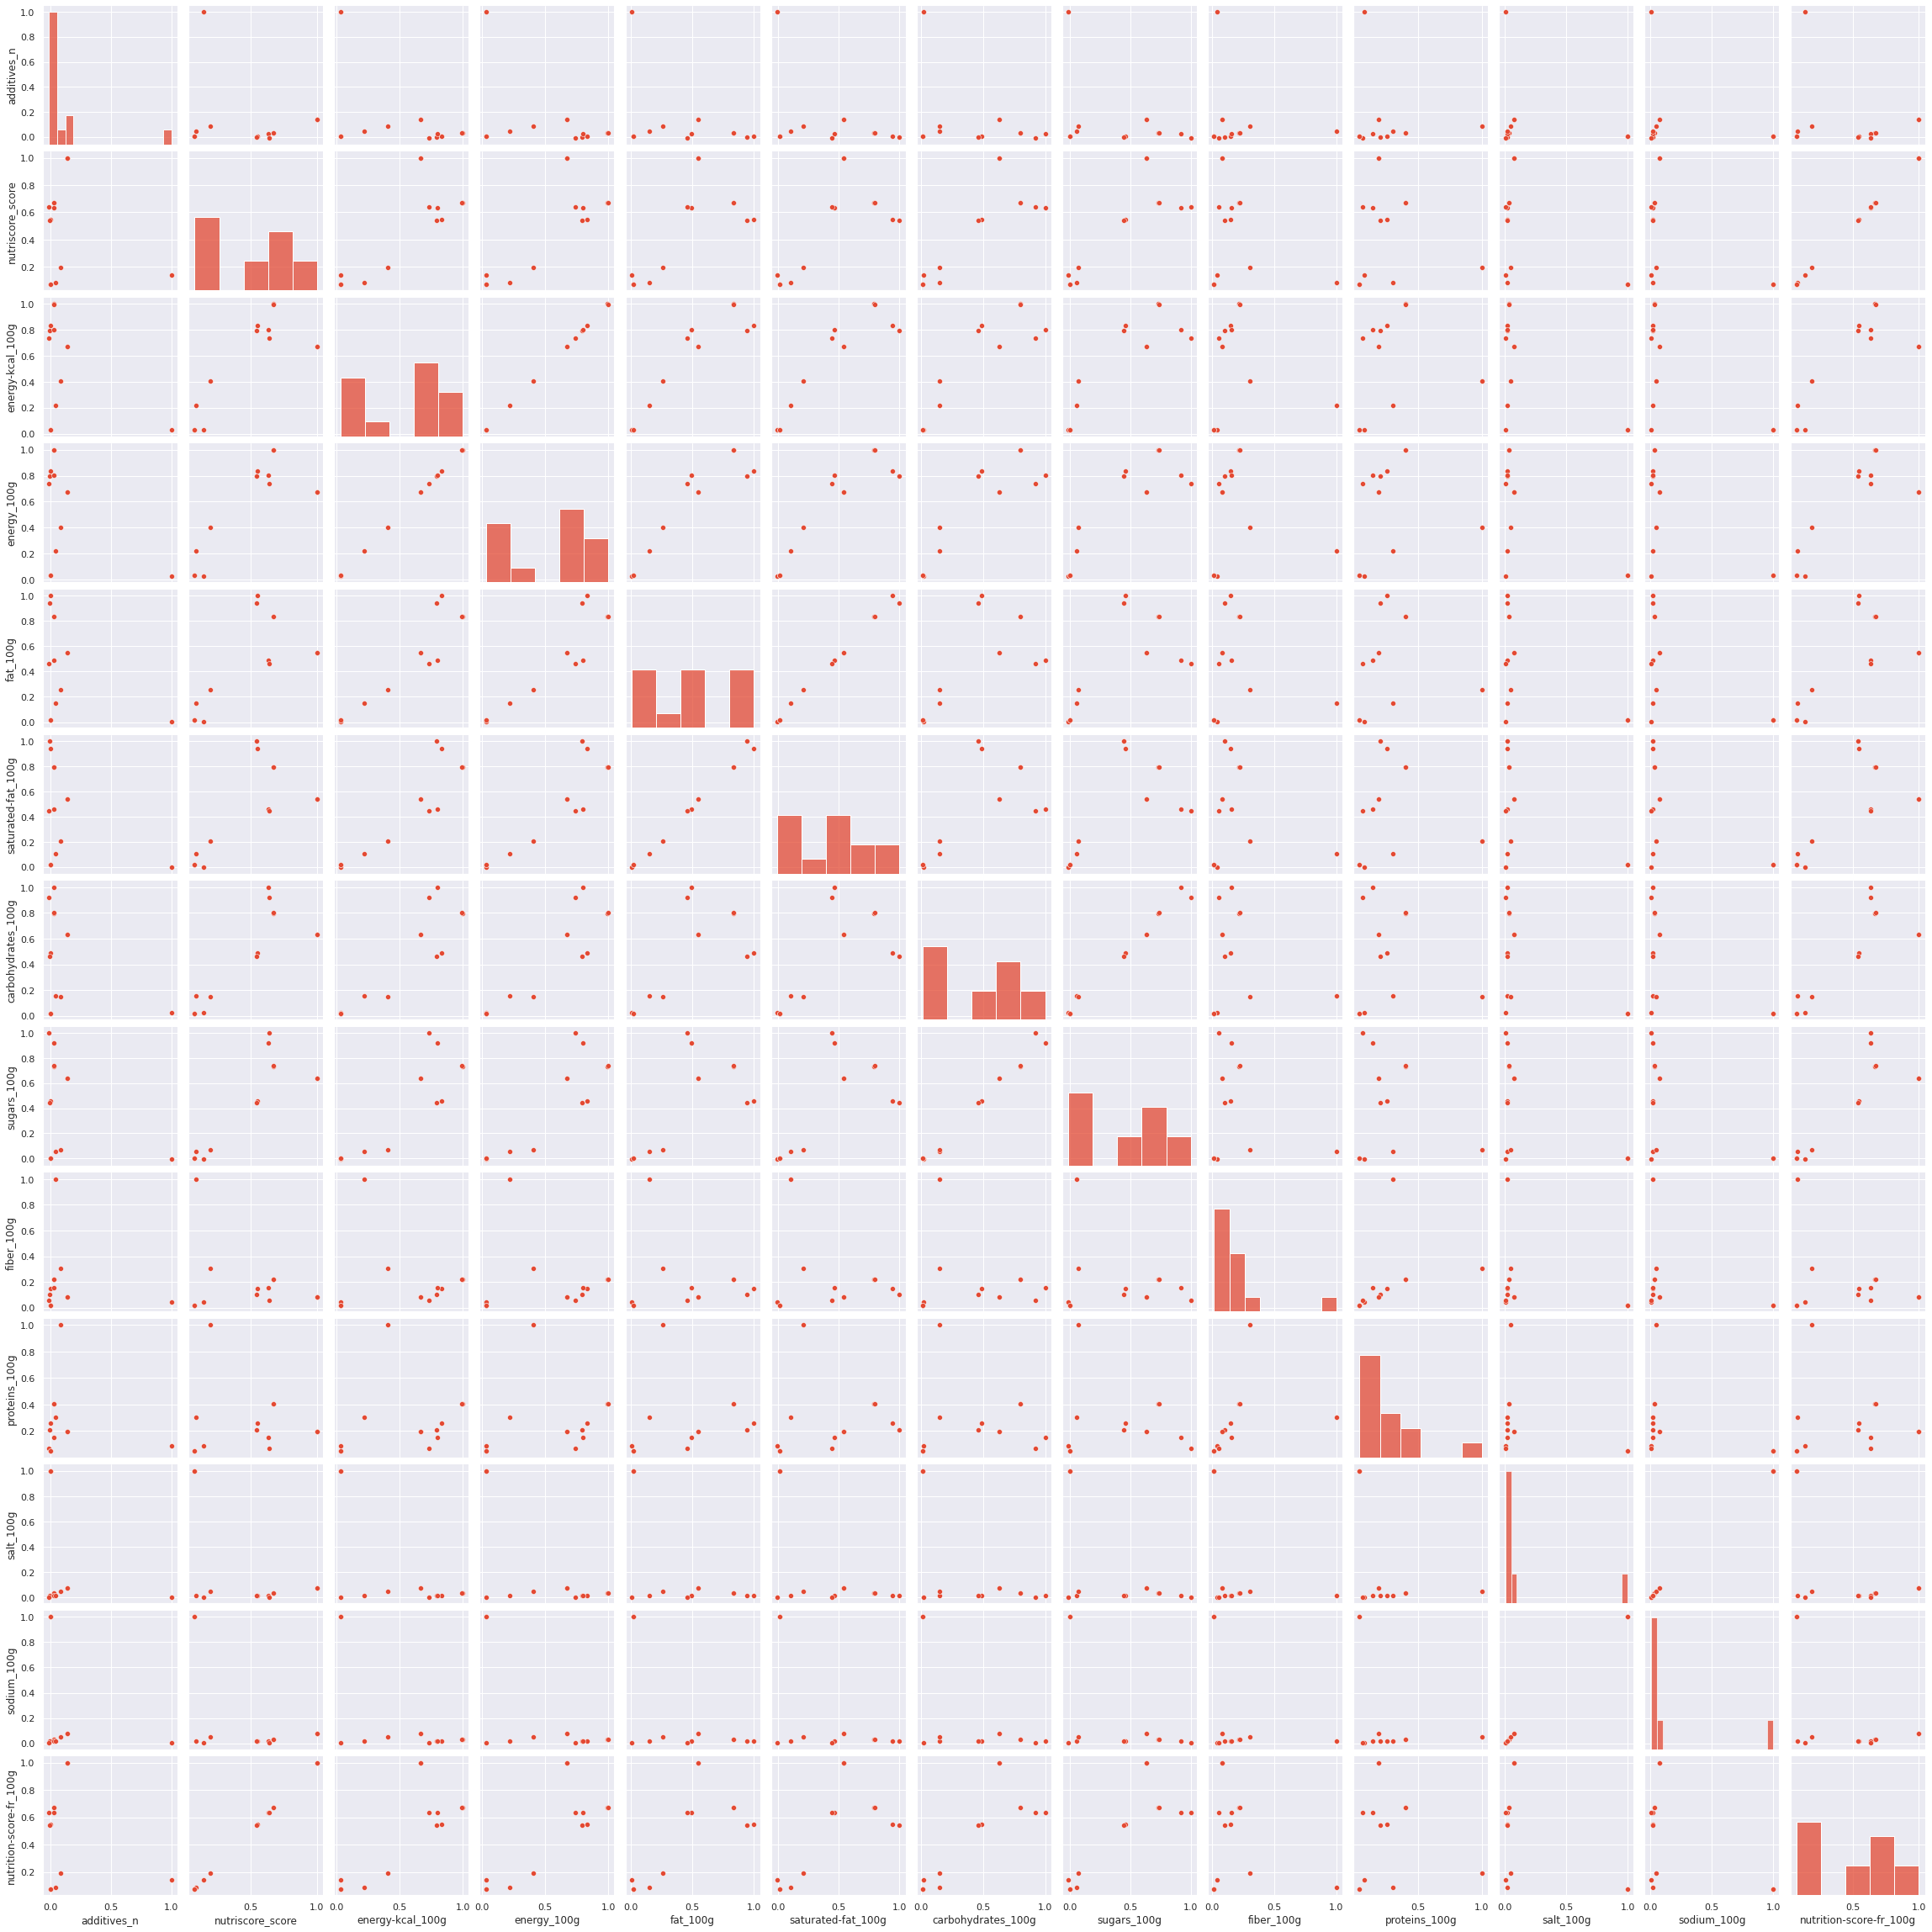

In [173]:
sns.pairplot(data.corr())

#### Conclusion

Les variables salt et fiber sont influencé par des valeurs exceptionnelles, un test d'hypothése va nous permettre de determiner la variatino de corrélation

#### Test d'hypothése pour les variable salt et fiber 

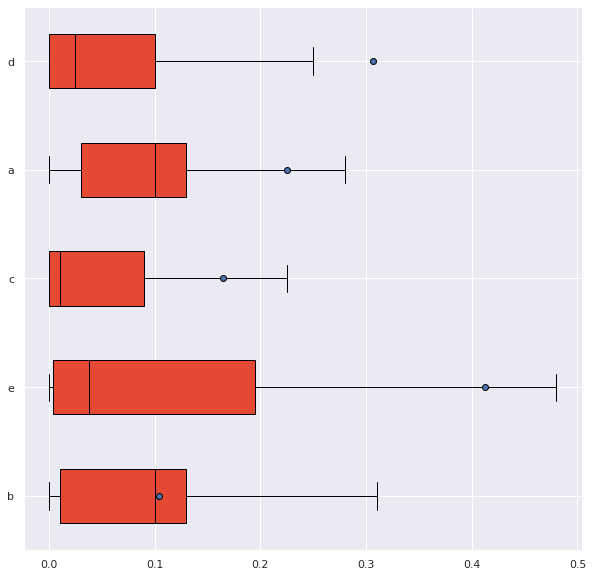

In [174]:
I = "nutriscore_grade" # qualitative
J = "salt_100g" # quantitative

modalites = data[I].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[I]==m][J])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'b'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [175]:
eta_squared(data[I],data[J])

0.002024898788703291

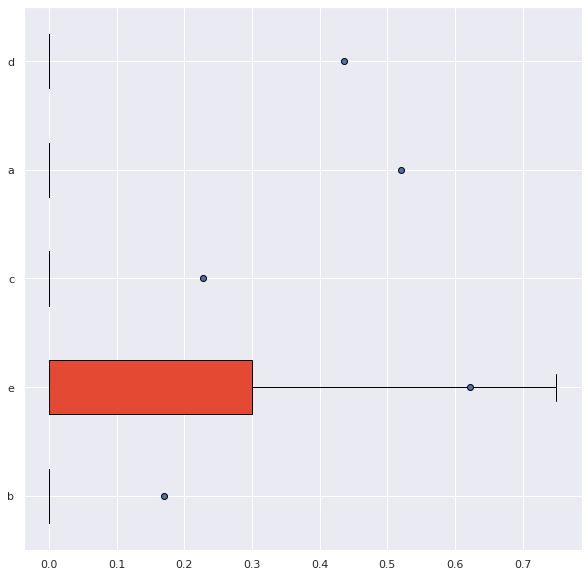

In [176]:
K = "nutriscore_grade" # qualitative
L = "fiber_100g" # quantitative

modalites = data[K].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[K]==m][L])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'b'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [177]:
eta_squared(data[K],data[L])

0.007722564439319399

#### Conclusion

Eta carré étant très proche de 0 toutes les moyennes sont proches: **pas de corrélation**

- fiber

        N'est pas significatif dans le calcul du nutriscore

- salt

        N'est pas significatif dans le calcul du nutriscore

# Conclusion

## Nous avons pu mettre en evidence:

- **la significativitée de la catégorie pour le nutriscore**
- **l'utilité du label dans le calcul du nutriscore**
- **la non significativitée du nombre d'additifs dans un produit dans le calcul du nutriscore**
- **la non significativité des nutriments salt et fiber dans le calcul du nutriscore**

------------------------------------------------------------------------------------------------------------------